<a href="https://colab.research.google.com/github/MinsooKwak/Data_Analysis/blob/main/HR/%ED%87%B4%EC%A7%81%EC%9D%84_%EC%B4%89%EB%B0%9C%ED%95%98%EB%8A%94_%EC%A3%BC%EC%9A%94_%EC%9A%94%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퇴직을 촉발하는 주요 요인 분석

### Font

In [1]:
#!sudo apt-get install -y fonts-nanum  ## 폰트설치
#!sudo fc-cache -fv ## 폰트 업데이트
#!rm ~/.cache/matplotlib -rf ## 캐쉬된 matplotlib 폰트 삭제하여 재로딩

In [2]:
# ttflist에 Nanum 글자 들어가는 폰트 있는지 확인하는 코드
import matplotlib.font_manager as fm  # 폰트 관련 용도
f = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

['NanumMyeongjo',
 'NanumGothicCoding',
 'NanumGothic',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumSquareRound',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumSquare']

In [3]:
#폰트종류설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] ='NanumSquare'

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다

current_font()

Python 3.10.12
설정 폰트 글꼴: ['NanumSquare'], 설정 폰트 사이즈: 10.0


## Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/drive/MyDrive/DA_degree/과제/1주차_HR/Data/데이터분석_Expert_HR_데이터.csv')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


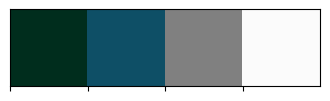

In [7]:
sns.palplot(['#002d1d','#0e4f66','gray','#fbfbfb'])

## Data Description

- 개인 특성
  - Age : 나이
  - Over18 : 18세 이상
  - Gender : 성별
  - DistanceFromHome : 집과의 거리
  - MaritalStatus : 결혼 여부

- 교육 관련
  - PerformanceRating : 업무 성과
  - TotalWorkingYears : 경력기간
  - Education : 교육의 정도
  - EducationField : 전공
  - TrainingTimesLastYear : 교육 시간  

- 보상
  - DailyRate : 일 대비 급여 수준
  - HourlyRate : 시간 대비 급여 수준
  - MonthlyIncome : 월 소득
  - MonthlyRate : 월 대비 급여 수준
  - PercentSalaryHike : 급여의 증가분 백분율
  - StockOptionLevel : 스톡옵션 정도

- 업무 관련 수준 및 만족도
  - 수준
    - Department : 업무 분야
    - BusinessTravel : 출장 빈도
    - JobInvolvement : 업무 참여도
    - JobLevel : 업무 수준
    - JobRole : 업무 종류
    - OverTime : 규정 외 노동시간
    - WorkLifeBalance : 일과 생활의 균형 정도
    - YearsAtCompany : 근속 연수
    - YearsInCurrentRole : 현재 역할의 년수
    - NumCompaniesWorkded : 일한 회사의 수
  - 만족도
    - JobSatisfaction : 업무 만족도
    - YearsSinceLastPromotion : 마지막 프로모션
    - YearsWithCurrManager : 현재 관리자와 함께 보낸 시간
    - Attrition : 퇴직 여부
    - EnvironmentSatisfaction : 업무 환경에 대한 만족도
    - RelationshipSatisfaction : 대인관계 만족도

- 기타
  - EmployeeCount : 직원 숫자
  - EmployeeNumber : 직원 ID
  - StandardHours : 표준 시간

### 퇴직의 비율은 어떻게 되는가?

In [8]:
x = df.groupby(['Attrition'])['Attrition'].count()
y = len(df)
r = ((x/y)).round(2)
ratio = pd.DataFrame(r).T
ratio

Attrition,No,Yes
Attrition,0.84,0.16


In [9]:
no_value = ratio.No.values[0]
yes_value = ratio.Yes.values[0]
print(no_value)
print(yes_value)

0.84
0.16


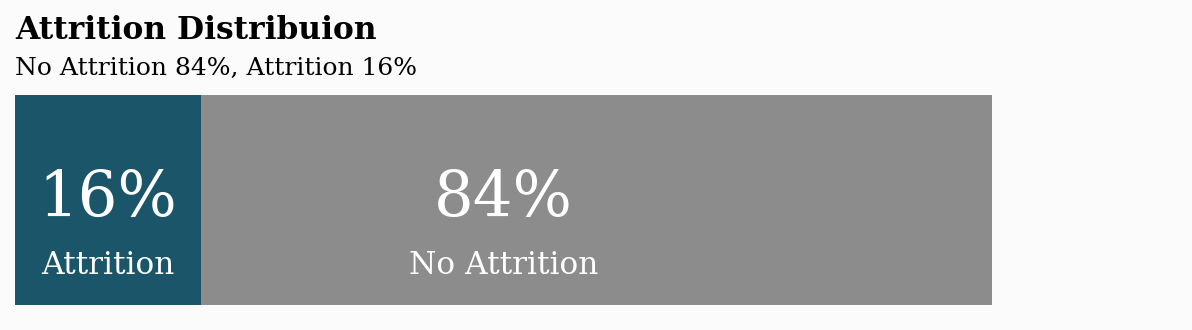

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10, 2), dpi=150)
background_color = '#fbfbfb'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.barh(ratio.index, ratio['No'], color='gray', alpha=0.9, label='No Attition')
ax.barh(ratio.index, ratio['Yes'], color='#0e4f66', alpha=0.9, label='Attrition')

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)

for s in ['top','left','right','bottom']:
  ax.spines[s].set_visible(False)

# No Attrition percent
for i in ratio.index:
  ax.annotate(f"{int(ratio['No'][i]*100)}%",
              xy = (ratio['No'][i]/2, i),
              va = 'center', ha='center', fontsize=30, fontweight='light', fontfamily='serif',
              color='white')
  ax.annotate(f"No Attrition",
              xy = (ratio['No'][i]/2, -0.25),
              va = 'center', ha='center', fontsize=15, fontweight='light', fontfamily='serif',
              color='white')

# Attrition percent
for i in ratio.index:
  ax.annotate(f"{int(ratio['Yes'][i]*100)}%",
              xy = (ratio['Yes'][i]/2, i),
              va = 'center', ha='center', fontsize=30, fontweight='light', fontfamily='serif',
              color='white')
  ax.annotate("Attrition",
              xy = (ratio['Yes'][i]/2, -0.25),
              va = 'center', ha='center', fontsize=15, fontweight='light', fontfamily='serif',
              color='white')

# Title
fig.text(0.125, 1.03, "Attrition Distribuion",
         fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.125, 0.91, "No Attrition 84%, Attrition 16%",
         fontfamily='serif', fontsize=12, fontweight='light')

ax.legend().set_visible(False)

plt.show()

In [11]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [12]:
df.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

# 업무 성과별 요인의 특징

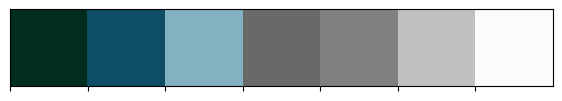

In [13]:
sns.palplot(['#002d1d','#0e4f66','#82b1c2','dimgray','gray','#c0c0c0','#fbfbfb'])

## Distance From Home

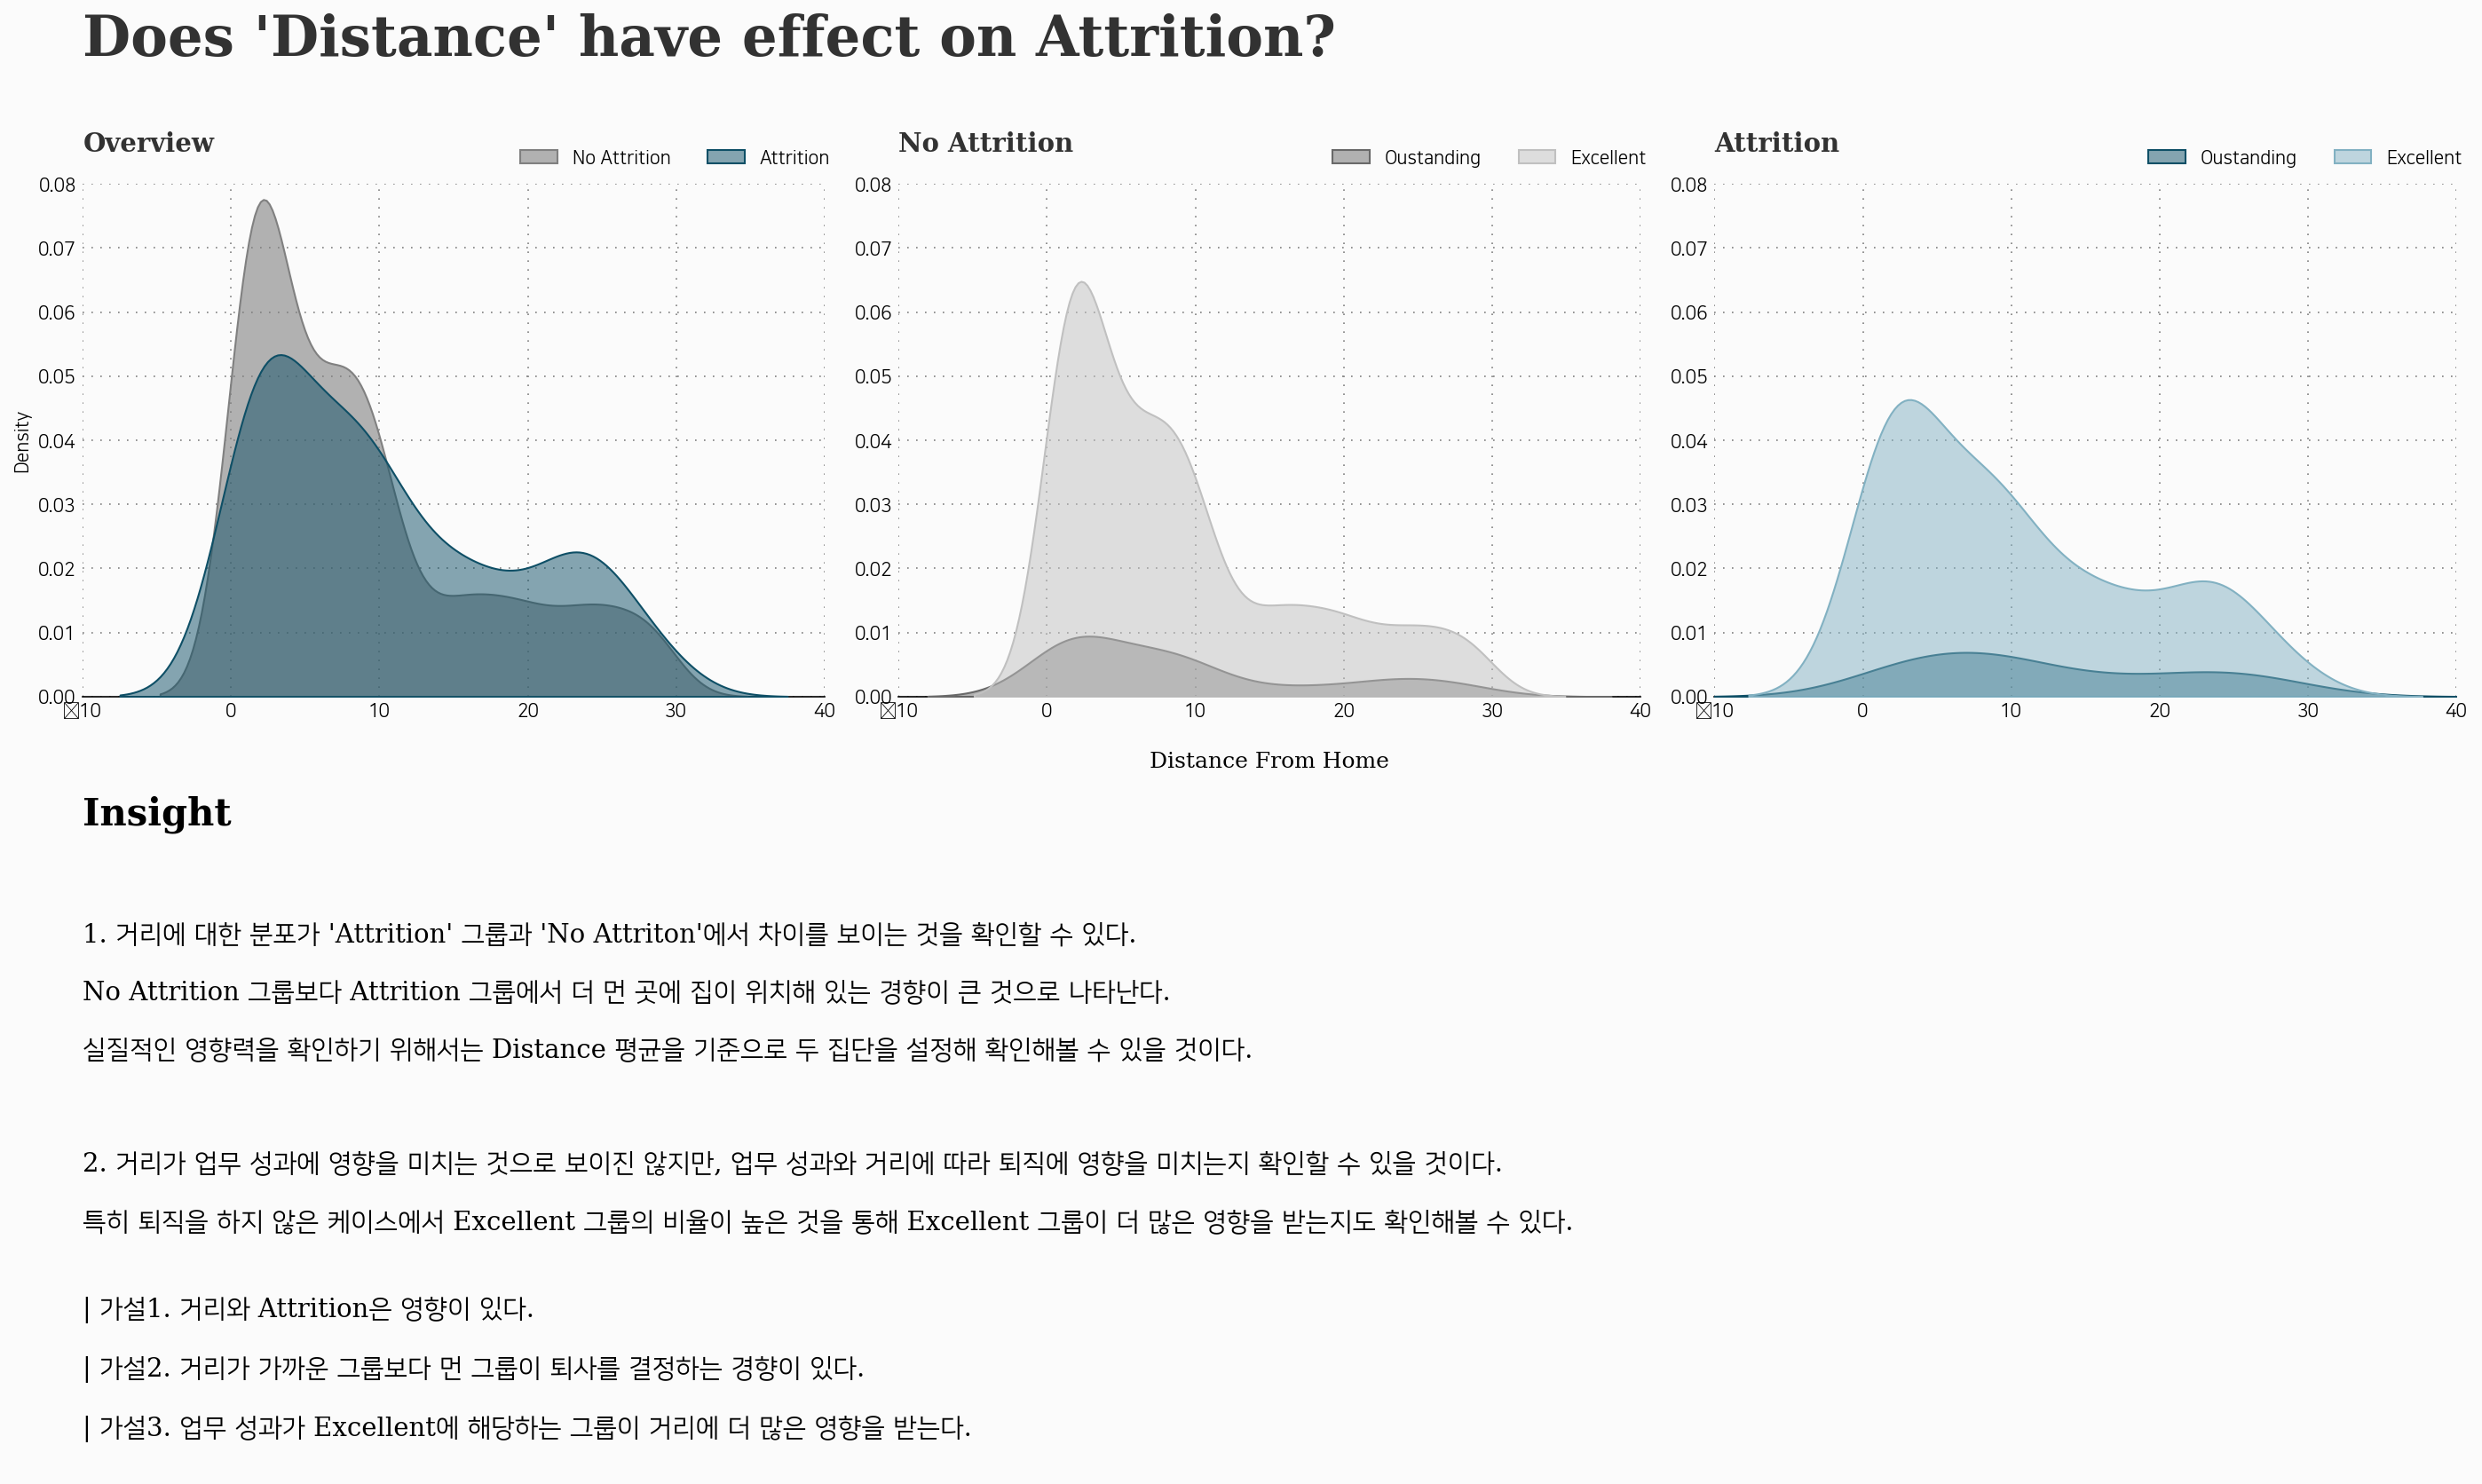

In [14]:
# 배경 색상 및 팔레트
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(23,5), dpi=150)
fig.patch.set_facecolor(background_color)

# ax 설정
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.1, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])



#### A0 - 집과의 거리(DistanceFromHome) # 1~30
ax0.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
train = pd.DataFrame(df[df['Attrition']=='No'])
test = pd.DataFrame(df[df['Attrition']=='Yes'])

## 1) 퇴직 / 퇴직하지 않은 사람들에 대한 비교
sns.kdeplot(train['DistanceFromHome'], ax=ax0, color='gray', shade=True,
            label='No Attrition', zorder=3, alpha=0.6)
sns.kdeplot(test['DistanceFromHome'], ax=ax0, color="#0e4f66", shade=True,
            label='Attrition', zorder=3, alpha=0.5)

ax0.legend(['No Attrition','Attrition'], loc='lower right', ncols=2,
           bbox_to_anchor=(1.03,1), facecolor=background_color, edgecolor=background_color)

ax0.text(-10, 0.085, "Overview", fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')

# 축 범위 지정
ax0.set_xlim(-10,40)
ax0.set_ylim(0,0.08)

## 2) Perfomance에 따른 거리 비교 (퇴직하지 않은 사람)
ax1.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.kdeplot(data=train,x='DistanceFromHome', ax=ax1, hue='PerformanceRating',
            palette=['#c0c0c0','dimgray'],
            zorder=3, alpha=0.5, shade=True)

ax1.legend(['Oustanding','Excellent'], loc='lower right', ncols=2,
           bbox_to_anchor=(1.03,1), facecolor=background_color, edgecolor=background_color)

ax1.text(-10, 0.085, "No Attrition", fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')

# 축 범위 지정
ax1.set_xlim(-10,40)
ax1.set_ylim(0,0.08)

## Performance에 따른 거리 비교 (퇴직한 사람)
ax2.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.kdeplot(data=test,x='DistanceFromHome', ax=ax2, hue='PerformanceRating',
            palette=['#82b1c2','#0e4f66'],
            zorder=3, alpha=0.5, shade=True)

ax2.legend(['Oustanding','Excellent'], loc='lower right', ncols=2,
           bbox_to_anchor=(1.03,1), facecolor=background_color, edgecolor=background_color)

# 축 범위 지정
ax2.set_xlim(-10,40)
ax2.set_ylim(0,0.08)

ax2.text(-10, 0.085, "Attrition", fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')

#### Insight
ax0.text(-10, 0.1, "Does 'Distance' have effect on Attrition?", fontsize=30, fontweight='bold', fontfamily='serif', color='#323232')

dist_insight1 = """

1. 거리에 대한 분포가 'Attrition' 그룹과 'No Attriton'에서 차이를 보이는 것을 확인할 수 있다. \n
No Attrition 그룹보다 Attrition 그룹에서 더 먼 곳에 집이 위치해 있는 경향이 큰 것으로 나타난다.\n
실질적인 영향력을 확인하기 위해서는 Distance 평균을 기준으로 두 집단을 설정해 확인해볼 수 있을 것이다.\n\n

2. 거리가 업무 성과에 영향을 미치는 것으로 보이진 않지만, 업무 성과와 거리에 따라 퇴직에 영향을 미치는지 확인할 수 있을 것이다.\n
특히 퇴직을 하지 않은 케이스에서 Excellent 그룹의 비율이 높은 것을 통해 Excellent 그룹이 더 많은 영향을 받는지도 확인해볼 수 있다. \n

| 가설1. 거리와 Attrition은 영향이 있다.\n
| 가설2. 거리가 가까운 그룹보다 먼 그룹이 퇴사를 결정하는 경향이 있다.\n
| 가설3. 업무 성과가 Excellent에 해당하는 그룹이 거리에 더 많은 영향을 받는다.
"""
ax0.text(-10, -0.02, "Insight", fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-10, -0.12, dist_insight1,fontsize=14, fontweight='light', fontfamily=['serif','NanumSquare'],color='black')

# ax의 색상 배경 색상과 동일하게 채우기
for i in range(0,3):
  locals()['ax'+str(i)].set_facecolor(background_color)

# 눈금, 눈금 레이블 및 격자 선 매개변수 양쪽 축에 적용
for i in range(0,3):
  locals()['ax'+str(i)].tick_params(axis=u'both', which=u'both', length=0)

# 축 지우기
for s in ['top','right','left']:
  for i in range(0,3):
    locals()['ax'+str(i)].spines[s].set_visible(False)

# x축 이름 설정
ax0.set_xlabel('')
ax1.set_xlabel('\nDistance From Home', fontfamily='serif', fontsize=12, fontweight='light')
ax2.set_xlabel('')

# y축 이름 설정
ax0.set_ylabel('Density')
ax1.set_ylabel('')
ax2.set_ylabel('')
plt.show()

- 수치에 대한 절대량(count)이 아닌 비율(상대정보)를 활용하기 위해 kdeplot을 통해 거리에 대한 snapshot을 확인했다.



### 가설 1

- H0 : 거리와 Attrition은 연관이 없다.
- H1 : 거리와 Attrition은 연관이 있다.

In [15]:
df['DistanceFromHome'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


In [16]:
df.groupby(['Attrition'])['DistanceFromHome'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Yes,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0


In [17]:
# 8.1 보다 크거나 같으면 1로, 작으면 0으로
df['Distance_group'] = df['DistanceFromHome'].apply(lambda x: 'Far' if x>=8.11 else 'Near')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Distance_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Near
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Near
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Near


In [18]:
df.Distance_group.value_counts(normalize=True).to_frame()

,proportion
Distance_group,
Near,0.581633
Far,0.418367


<Axes: xlabel='Distance_group', ylabel='count'>

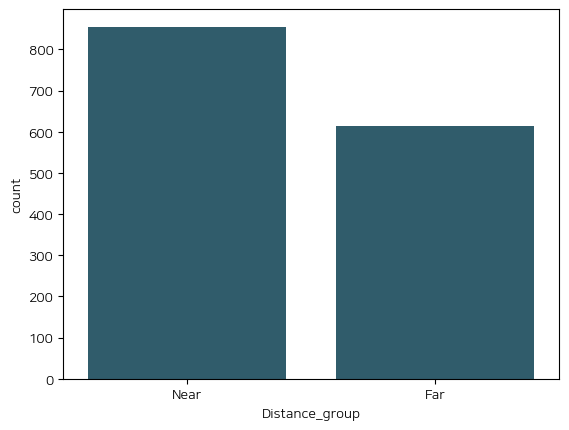

In [19]:
sns.barplot(df.Distance_group.value_counts(), color='#0e4f66', alpha=0.9)

- chi2 검정
  1. 적합도 검정 : 한 범주현 변수의 그룹 별 비율과 특정 상수비(기존 기준)이 같은지
  2. 동질성 검정 : 각 집단이 서로 유사한 성향 같는지 검정
  3. 독립성 검정 : 두 범주형 변수가 독립인지 검정

In [20]:
distance_att_cross = pd.crosstab(df['Distance_group'], df['Attrition'])
distance_att_cross

Attrition,No,Yes
Distance_group,,
Far,493,122
Near,740,115


In [21]:
import scipy
from scipy import stats
from scipy.stats import chi2_contingency

chi2, pvalue, _, _ = stats.chi2_contingency(distance_att_cross, correction=False)
print(f'Chi-2    : {chi2}')
print(f'p- value : {pvalue}')

Chi-2    : 10.790843323914574
p- value : 0.0010200340121534705


- p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다.
- chi2 귀무가설은 "두 변수는 연관이 없다"로, 대립가설은 "거리와 Attrition은 연관이 있다"

### 가설2

- H0 : 거리가 가까운 그룹과 먼 그룹이 퇴사 여부에는 차이가 없다.
- H1: 거리가 가까운 그룹보다 먼 그룹이 퇴사를 결정하는 경향이 있다.

- 로지스틱 회귀 분석

In [22]:
dist_att_2 = df[['Distance_group','Attrition']]
dist_att_2.head(3)

,Distance_group,Attrition
0,Near,Yes
1,Near,No
2,Near,Yes


In [23]:
# Attrition Encoding
dist_att_2['Attrition'] = dist_att_2['Attrition'].map({'No':0, 'Yes':1})

# Distance Encoding
distance_dummies = pd.get_dummies(df['Distance_group'], prefix='Distance', dtype=int) # 더미 변수 열 이름 지정

# DataFrame 병합
dist_att_2 = pd.concat([dist_att_2, distance_dummies[['Distance_Far','Distance_Near']]], axis=1)
dist_att_2.head()

,Distance_group,Attrition,Distance_Far,Distance_Near
0,Near,1,0,1
1,Near,0,0,1
2,Near,1,0,1
3,Near,0,0,1
4,Near,0,0,1


In [24]:
import statsmodels.api as sm

X = dist_att_2[['Distance_Far']]
X = sm.add_constant(X) # 상수항 추가
y = dist_att_2['Attrition'] # 종속변수 : Attrition 여부

# 로지스틱 회귀 모형
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.438068
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 May 2024   Pseudo R-squ.:                0.008212
Time:                        02:08:17   Log-Likelihood:                -643.96
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                  0.001093
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.8617      0.100    -18.574      0.000      -2.058      -1.665
Distance_Far     0.4652

- Distance_Far의 p-value는 (P>|z|)는 0.001로 유의수준인 0.05보다 작으므로, 통계적으로 유의미한 영향을 미친다.
- Distance_Far의 계수(coef)가 양수(0.4652)이므로 'Far' 그룹이 'Near' 그룹에 비해 퇴직하는 경향이 높다.

In [25]:
# 정확도까지 확인
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = dist_att_2[['Distance_Far']]
y = dist_att_2['Attrition'] # 종속변수 : Attrition 여부

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

# 학습 모델 활용해 테스트 데이터 예측
y_pred = result.predict(sm.add_constant(X_test))

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred.round())

# 분류 보고서 출력
report = classification_report(y_test, y_pred.round())

print(f"\nAccuracy : {round(accuracy*100,2)} %\n")
print("Classifciation Report :\n",report)

Optimization terminated successfully.
         Current function value: 0.450564
         Iterations 6

Accuracy : 86.73 %

Classifciation Report :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



- 해당 모델의 accuracy는 86.73% 이지만, 실제로 양성으로 예측해야 하는 1에 대한 정밀도가 0으로 나타나고 있다.
- support에는 클래스에서 실제 존재하는 샘플의 수를 나타내므로 </br>현재 0 클래스는 255개이나 1 클래스의 개수는 39로 불균형이 발생되었다.
- macro avg (평균값)으로 각 클래스에 대한 평균적인 값을 의미
- weighted avg (가중평균)은 support 개수로 가중 평균을 계산한 값

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# 데이터셋을 학습용과 테스트용으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE와 로지스틱 회귀를 하나의 파이프라인으로 정의
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('log_reg', LogisticRegression())
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],   # 규제 강도에 해당하는 C 값
    'log_reg__penalty': ['l1', 'l2']                # 규제 유형
}

# 그리드 서치 수행
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 모델
best_model = grid_search.best_estimator_

# 테스트 데이터 예측 및 분류 보고서 출력
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", report)

Best Parameters: {'log_reg__C': 0.001, 'log_reg__penalty': 'l2'}

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.65      0.75       255
           1       0.19      0.54      0.28        39

    accuracy                           0.63       294
   macro avg       0.55      0.59      0.52       294
weighted avg       0.81      0.63      0.69       294



- 해당 모델의 1에 대한 예측력이 올라간 것을 확인할 수 있다.
- 정밀도와 재현율을 모두 고려하는 f1을 기준으로 최적화를 시켰고, accuracy는 63%로 나타났다.

### 가설3

H0 : 업무성과가 Excellent에 해당하는 그룹이 거리에 더 많은 영향을 받는다.

In [27]:
dist_att_2 = df[['PerformanceRating','Attrition']]
dist_att_2

,PerformanceRating,Attrition
0,3,Yes
1,4,No
2,3,Yes
3,3,No
4,3,No
...,...,...
1465,3,No
1466,3,No
1467,4,No
1468,3,No


In [28]:
dist_att_2['Attrition'] = dist_att_2['Attrition'].map({'No':0, 'Yes':1})
dist_att_2['PerformanceRating'] = dist_att_2['PerformanceRating'].map({3:'Excellent', 4:'Oustanding'})
dummy_df2 = pd.get_dummies(dist_att_2['PerformanceRating'],dtype=int) # 더미 변수 열 이름 지정
dummy_df2_concat = pd.concat([dummy_df2, dist_att_2[['Attrition']]],axis=1)
dummy_df2_concat

,Excellent,Oustanding,Attrition
0,1,0,1
1,0,1,0
2,1,0,1
3,1,0,0
4,1,0,0
...,...,...,...
1465,1,0,0
1466,1,0,0
1467,0,1,0
1468,1,0,0


In [29]:
X = dummy_df2_concat[['Excellent']]
y = dummy_df2_concat['Attrition']


# 로지스틱 회귀 모델 생성
logit_model = sm.Logit(y, sm.add_constant(X))  # 절편을 위해 상수항 추가
result = logit_model.fit()

# 모델 요약 정보 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.441691
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 May 2024   Pseudo R-squ.:               9.415e-06
Time:                        02:08:23   Log-Likelihood:                -649.29
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.9120
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6308      0.180     -9.072      0.000      -1.983      -1.278
Excellent     -0.0217      0.

- p-value가 (P>|z|) 0.05보다 크므로 통계적으로 유의미한 영향을 미치지 않는다. </br>즉, 업무 성과가 Excellent일때와 그렇지 않을 때의 퇴직 여부는 유의미한 차이가 없다.

## Monthly Income

In [30]:
df[['MonthlyIncome','MonthlyRate','DailyRate','HourlyRate','PercentSalaryHike','StockOptionLevel']].describe()[1:].T

,mean,std,min,25%,50%,75%,max
MonthlyIncome,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
DailyRate,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
HourlyRate,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
PercentSalaryHike,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
StockOptionLevel,0.793878,0.852077,0.0,0.0,1.0,1.00,3.0


Text(3.5, 6, "\n**\n퇴직 그룹의 월 소득은 퇴직하지 않은 그룹에 비해 낮은 구간에 위치하는 것으로 보인다. \n\n한편 'No Attrition' 그룹 역시 '낮은 월 소득 구간'을 포함하고 있기 때문에 \n\n* 월 소득 구간을 제외하고 어떤 요인이 퇴직을 유발하는지 확인할 필요가 있다.\n\n\n\n**\nQ3 기준으로 이상치를 정의하지만, 우측의 Attrition과 No Attrition의 분포에서 \n\n확인할 수 있듯이 결과에 영향을 미치는 다른 요인이 존재할 수 있다. \n\n업무 성과 및 월 소득에 따라 3가지의 분포 양상을 구분하고, 관련성이 있는지 상관성을 살펴볼 수 있을 것이다.\n")

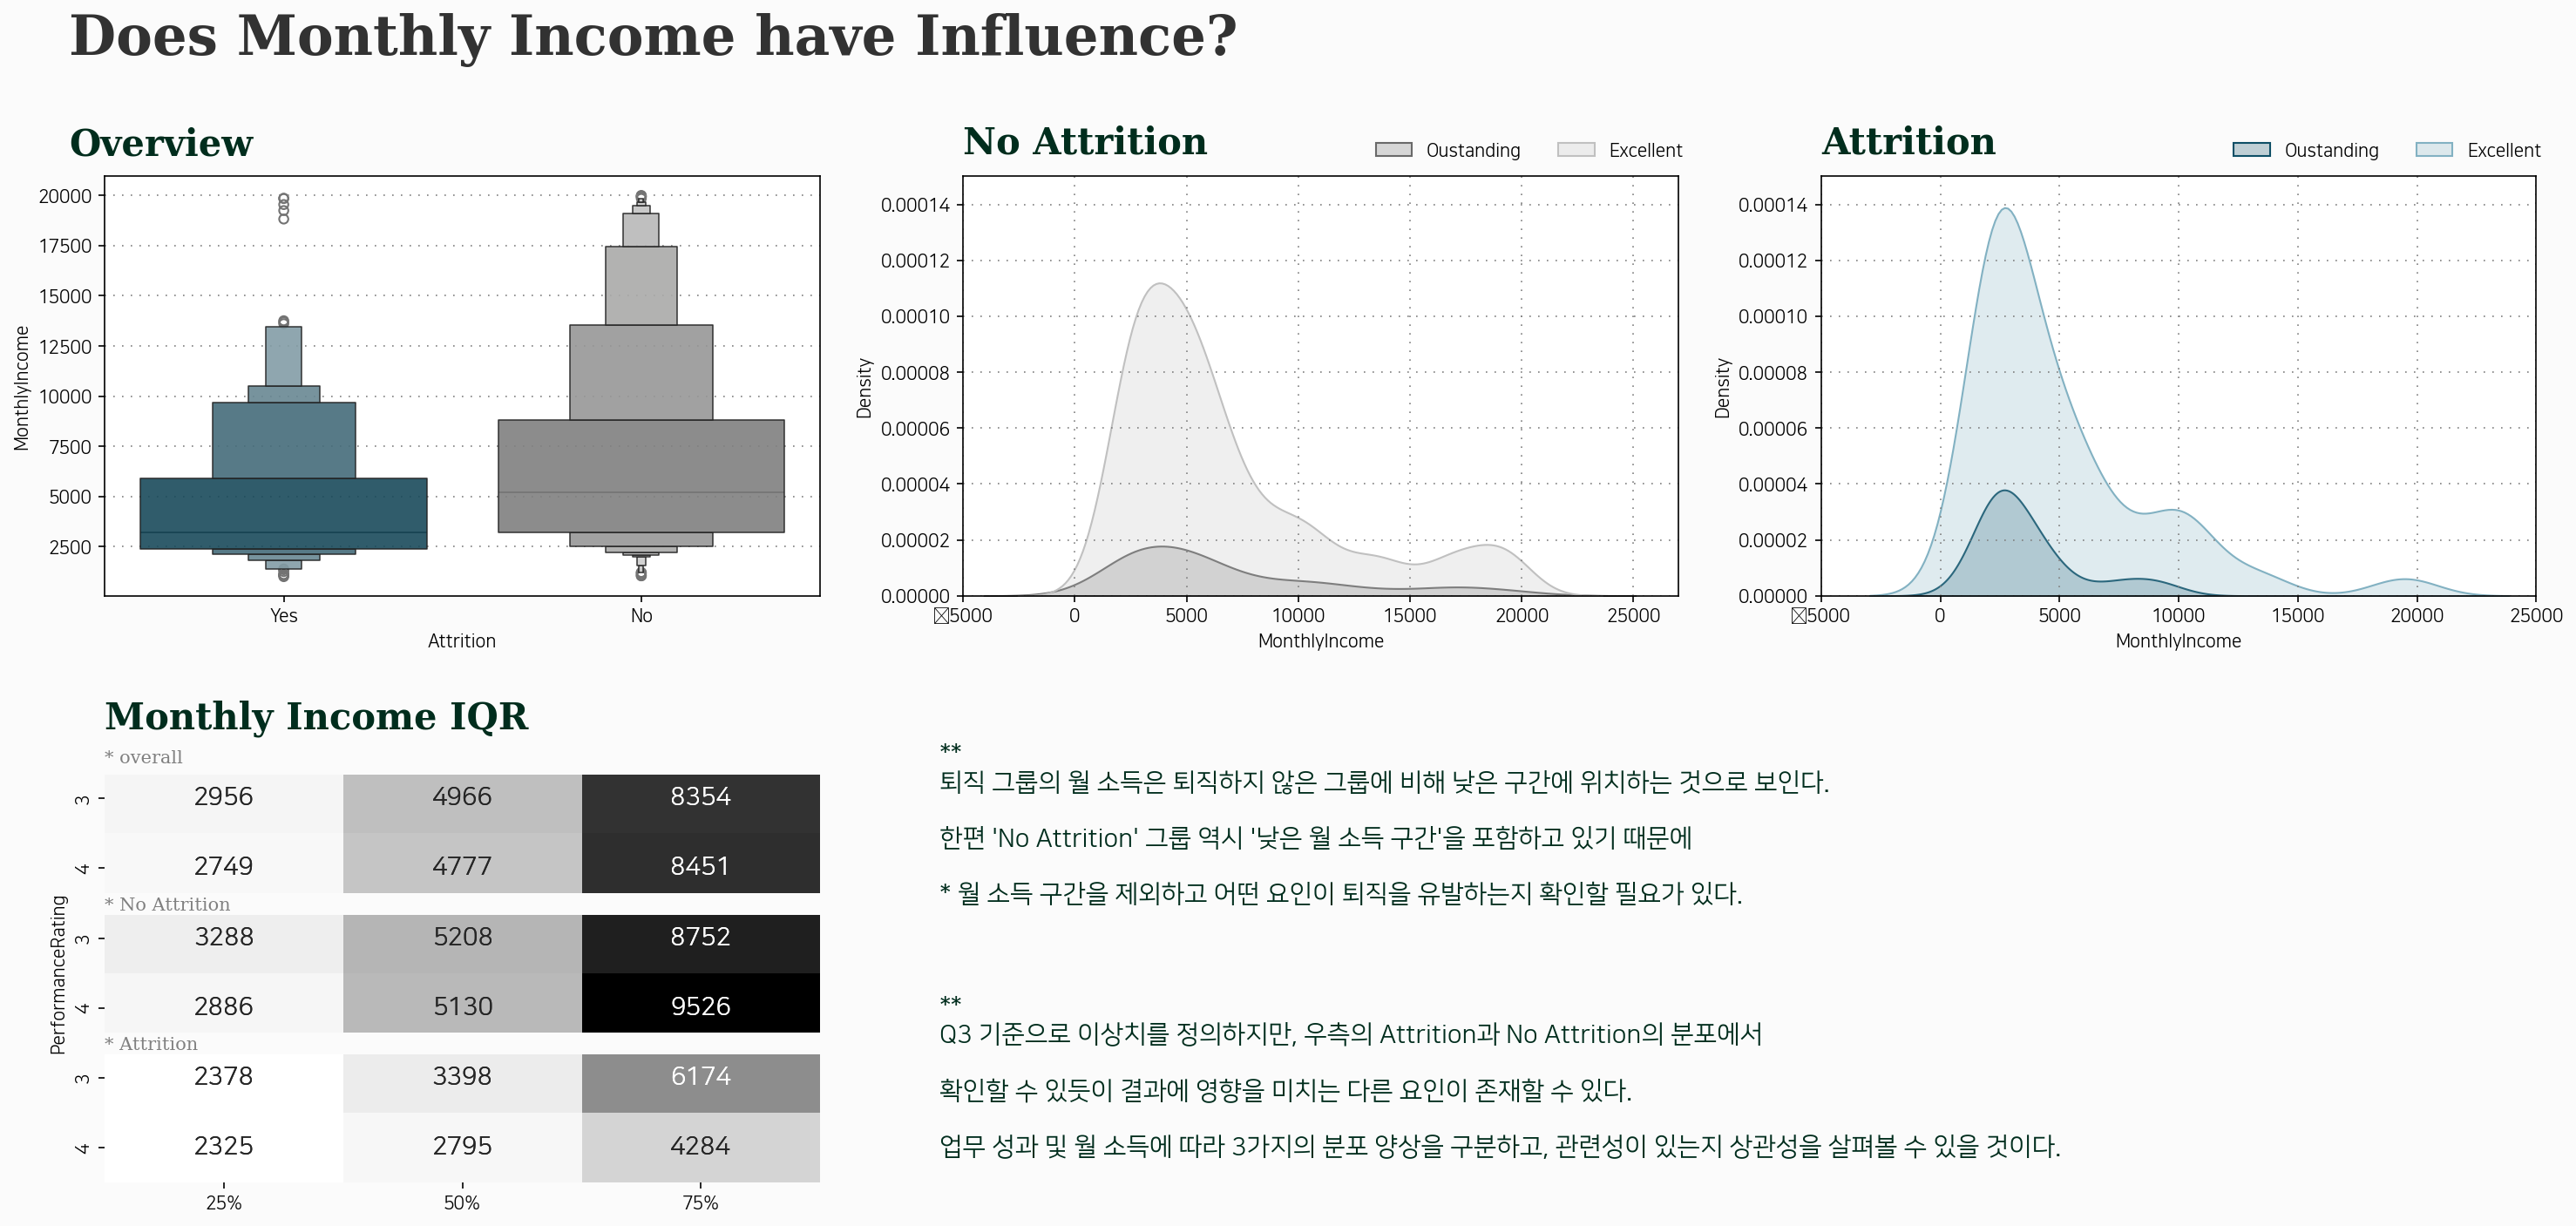

In [31]:
# 배경 색상 및 팔레트
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(24,10), dpi=150)
fig.patch.set_facecolor(background_color)

# ax 설정
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.4)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
#ax4 = fig.add_subplot(gs[1, 1])
#ax5 = fig.add_subplot(gs[1, 2])

###### Rewards

#### A0 - 월소득(MonthlyIncome)
ax0.text(-0.6, 27000, "Does Monthly Income have Influence?", fontsize=30, fontweight='bold', fontfamily='Serif', color='#323232')
ax0.text(-0.6, 22000, "Overview", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')
ax0.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.boxenplot(data=df, x='Attrition', y='MonthlyIncome', ax=ax0, palette=['#0e4f66','gray'], zorder=3, alpha=0.9)


#### A1 - 퇴직 여부에 따른 월 소득 분포
train = pd.DataFrame(df[df['Attrition']=='No'])
test = pd.DataFrame(df[df['Attrition']=='Yes'])

# No Attrition Group
ax1.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.kdeplot(data=train, x='MonthlyIncome', hue='PerformanceRating',
            palette=['#c0c0c0','dimgray'], ax=ax1,shade=True)

ax1.legend(['Oustanding','Excellent'], loc='lower right', ncols=2,
           bbox_to_anchor=(1.03,1), facecolor=background_color, edgecolor=background_color)

# 축 범위 지정
ax1.set_xlim(-5000,27000)
ax1.set_ylim(0,0.00015)

ax1.text(-5000, 0.000158, "No Attrition", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')



# Attrition Group
ax2.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.kdeplot(data=test, x='MonthlyIncome', hue='PerformanceRating',
            palette=['#82b1c2','#0e4f66'], ax=ax2,shade=True)

ax2.legend(['Oustanding','Excellent'], loc='lower right', ncols=2,
           bbox_to_anchor=(1.03,1), facecolor=background_color, edgecolor=background_color)

# 축 범위 지정
ax2.set_xlim(-5000,25000)
ax2.set_ylim(0,0.00015)
ax2.text(-5000, 0.000158, "Attrition", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')


#### A3 - Overall IQR

sns.heatmap(
    pd.concat([
    df.groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
    pd.DataFrame(df[df['Attrition']=='No']).groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
    pd.DataFrame(df[df['Attrition']=='Yes']).groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
],axis=0)
    ,cmap='Greys', cbar=False, annot=True, fmt='.0f',annot_kws={"size": 14}, ax=ax3)

ax3.text(0, -0.5, "Monthly Income IQR", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')

#### A4 - No Attrition IQR


monthly_income_IQR_df = pd.concat([
    df.groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
    pd.DataFrame(df[df['Attrition']=='No']).groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
    pd.DataFrame(df[df['Attrition']=='Yes']).groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
],axis=0)

sns.heatmap(monthly_income_IQR_df,cmap='Greys', cbar=False, annot=True, fmt='.0f',annot_kws={"size": 14}, ax=ax3)

ax3.axhline(y=0, color=background_color, linestyle='-', linewidth=12)
ax3.axhline(y=2, color=background_color, linestyle='-', linewidth=12)
ax3.axhline(y=4, color=background_color, linestyle='-', linewidth=12)
ax3.axhline(y=8, color=background_color, linestyle='-', linewidth=12)

ax3.text(0, 0, "* overall", fontsize=10, fontweight='light', fontfamily='serif', color='gray')
ax3.text(0, 2.1, "* No Attrition", fontsize=10, fontweight='light', fontfamily='serif', color='gray')
ax3.text(0, 4.1, "* Attrition", fontsize=10, fontweight='light', fontfamily='serif', color='gray')

# Insight
mon_insight ="""
**
퇴직 그룹의 월 소득은 퇴직하지 않은 그룹에 비해 낮은 구간에 위치하는 것으로 보인다. \n
한편 'No Attrition' 그룹 역시 '낮은 월 소득 구간'을 포함하고 있기 때문에 \n
* 월 소득 구간을 제외하고 어떤 요인이 퇴직을 유발하는지 확인할 필요가 있다.\n


**
Q3 기준으로 이상치를 정의하지만, 우측의 Attrition과 No Attrition의 분포에서 \n
확인할 수 있듯이 결과에 영향을 미치는 다른 요인이 존재할 수 있다. \n
업무 성과 및 월 소득에 따라 3가지의 분포 양상을 구분하고, 관련성이 있는지 상관성을 살펴볼 수 있을 것이다.
"""
ax3.text(3.5, 6, mon_insight, fontsize=14, fontweight='light', fontfamily=['NanumSquare','serif'], color='#002d1d')

#

In [32]:
# 7500, 15000 기준 A, B, C 그룹 나눔

def monthly_group(st):
  if st < 7500 :
    st = 'A'
  elif (7500 <= st) & (st < 15000):
    st = 'B'
  else :
    st = 'C'
  return st

In [33]:
df['monthly_group'] = df.MonthlyIncome.apply(monthly_group)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Distance_group,monthly_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,Near,A
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,Near,A
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,Near,A
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,Near,A
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,Near,A


In [34]:
df2 = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','monthly_group','Attrition']]
df2['Attrition'] = df2['Attrition'].map({'No':0, 'Yes':1})

<Axes: >

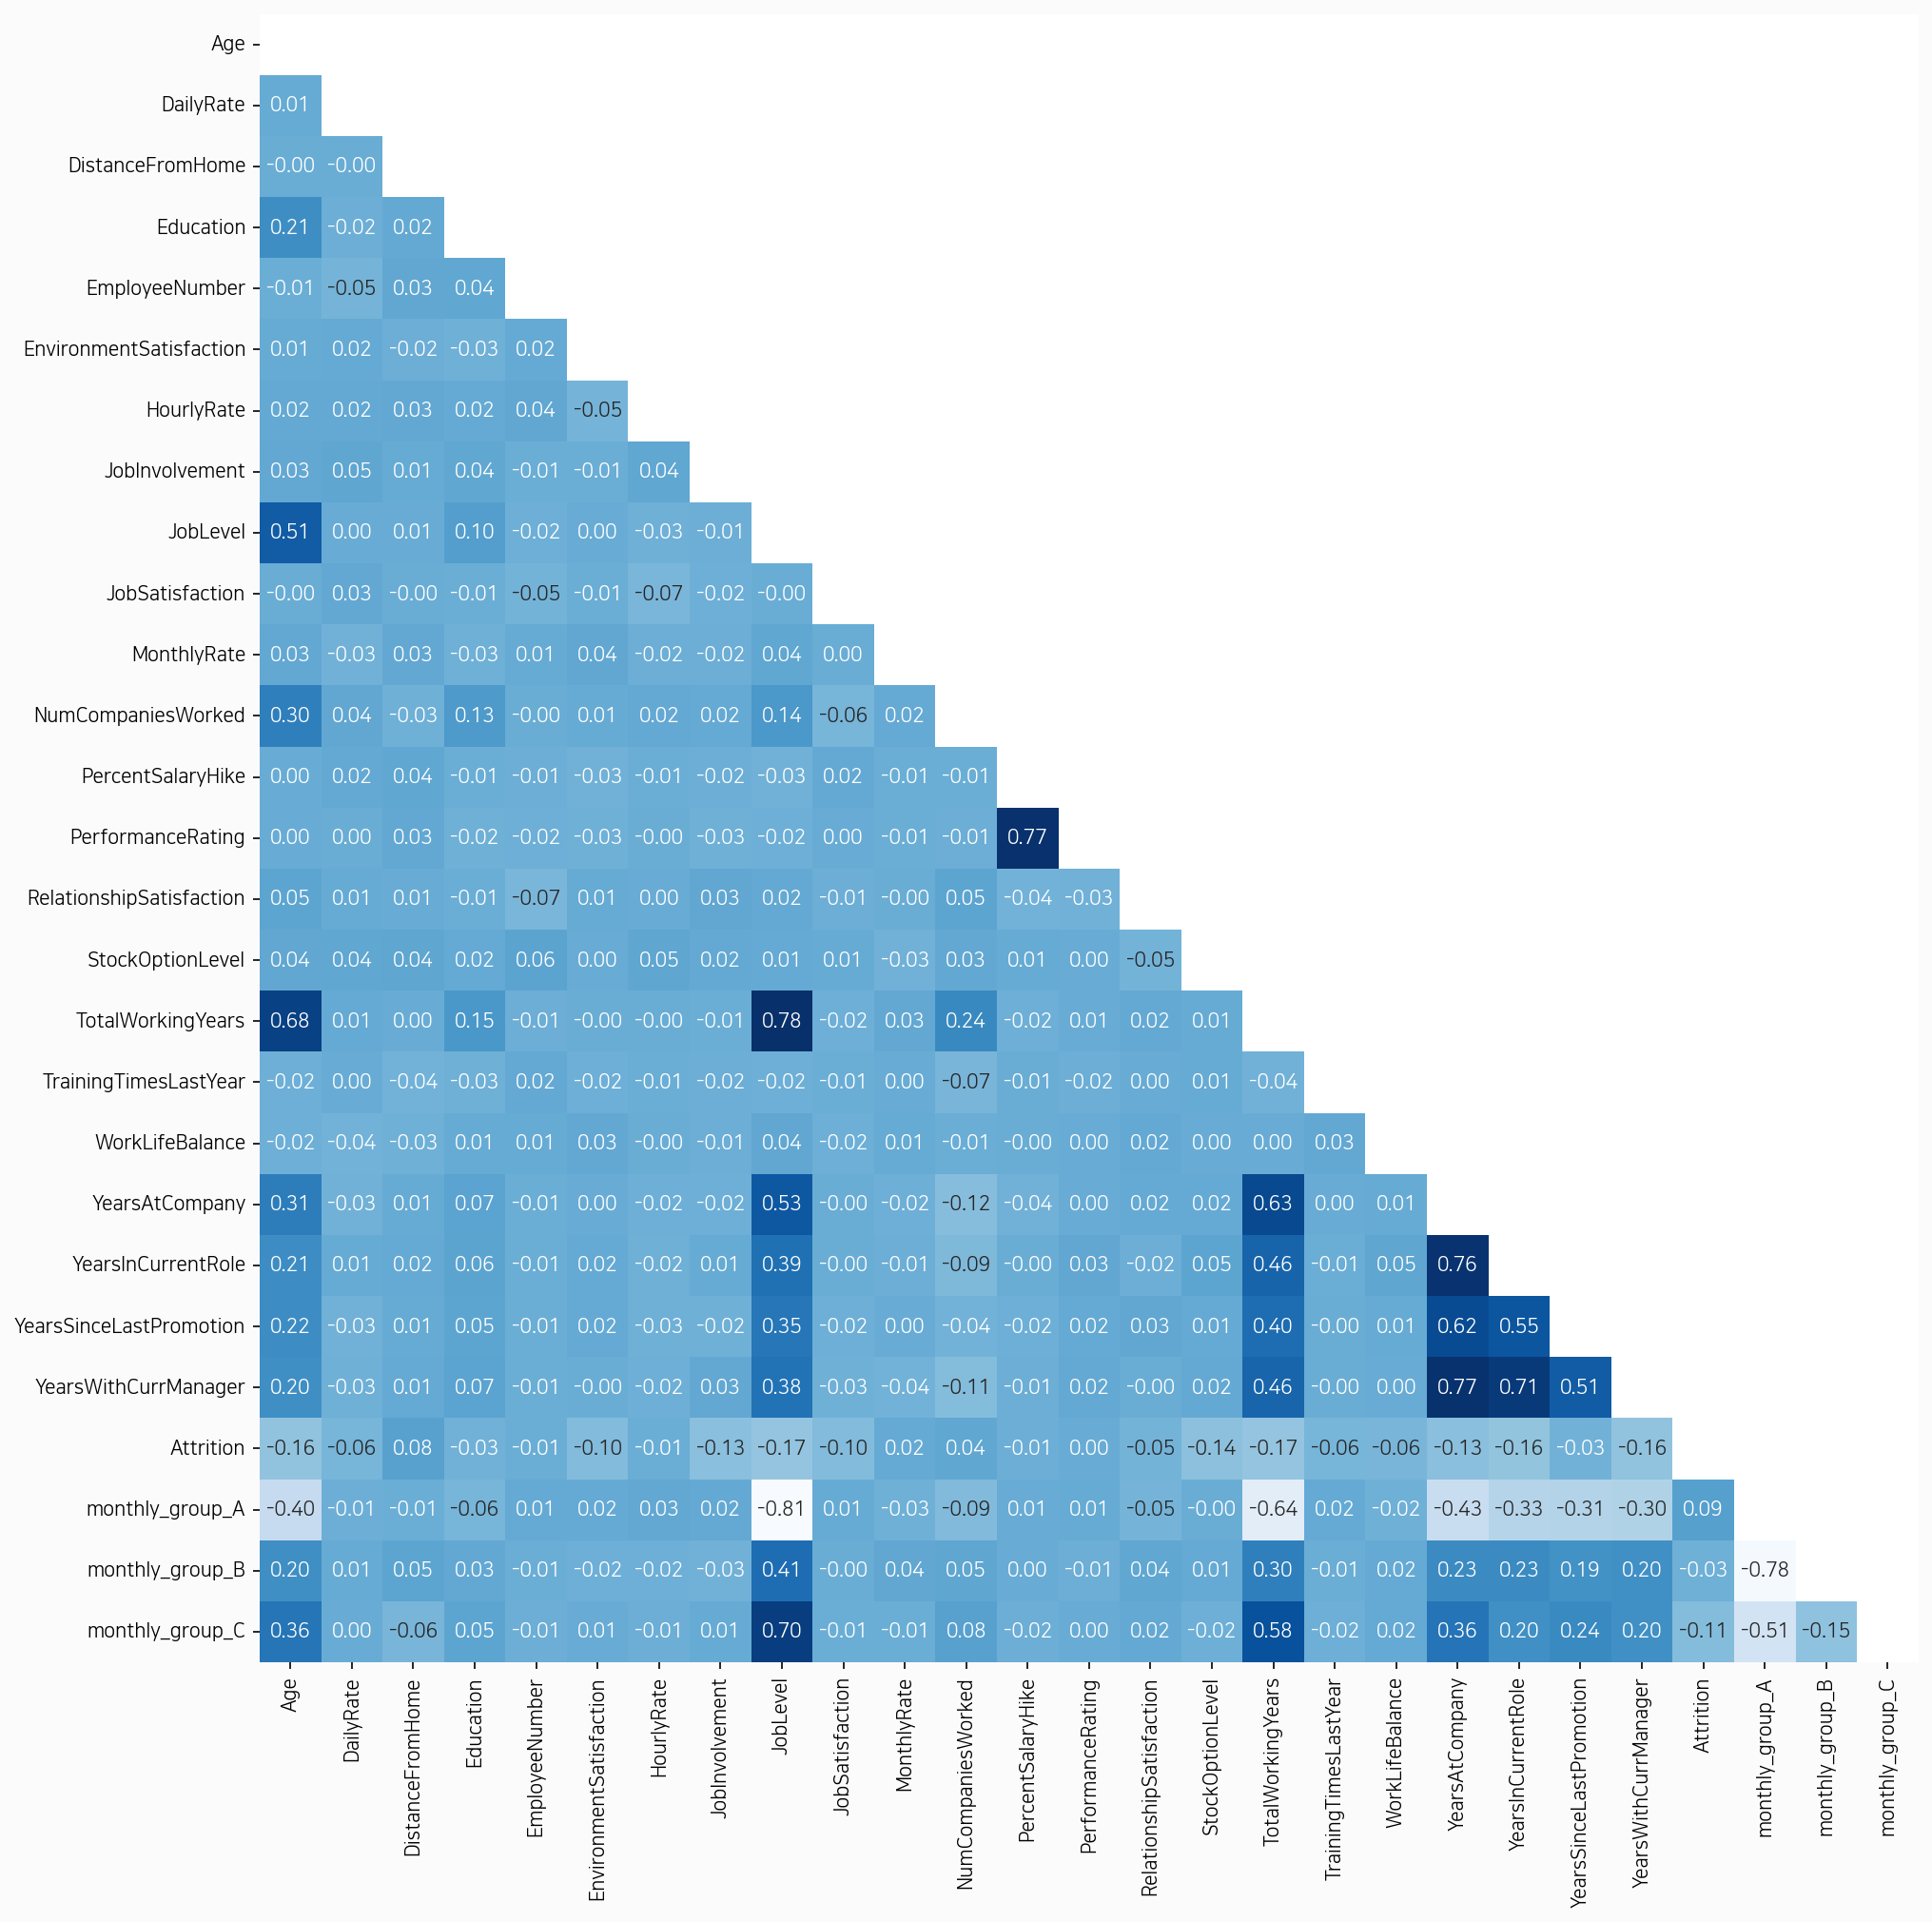

In [35]:
background_color = '#fbfbfb'
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15), dpi=150)
fig.patch.set_facecolor(background_color)

dummy_df = pd.get_dummies(df2[['monthly_group']])
df_corr = pd.concat([df2, dummy_df], axis=1)
df_corr.drop(['monthly_group','MonthlyIncome'], axis=1, inplace=True)
monthly_group_matrix = df_corr.corr()
sns.heatmap(monthly_group_matrix, annot=True, cmap='Blues', fmt=".2f", cbar=False,
            mask = np.triu(np.ones_like(monthly_group_matrix, dtype=bool))
            )

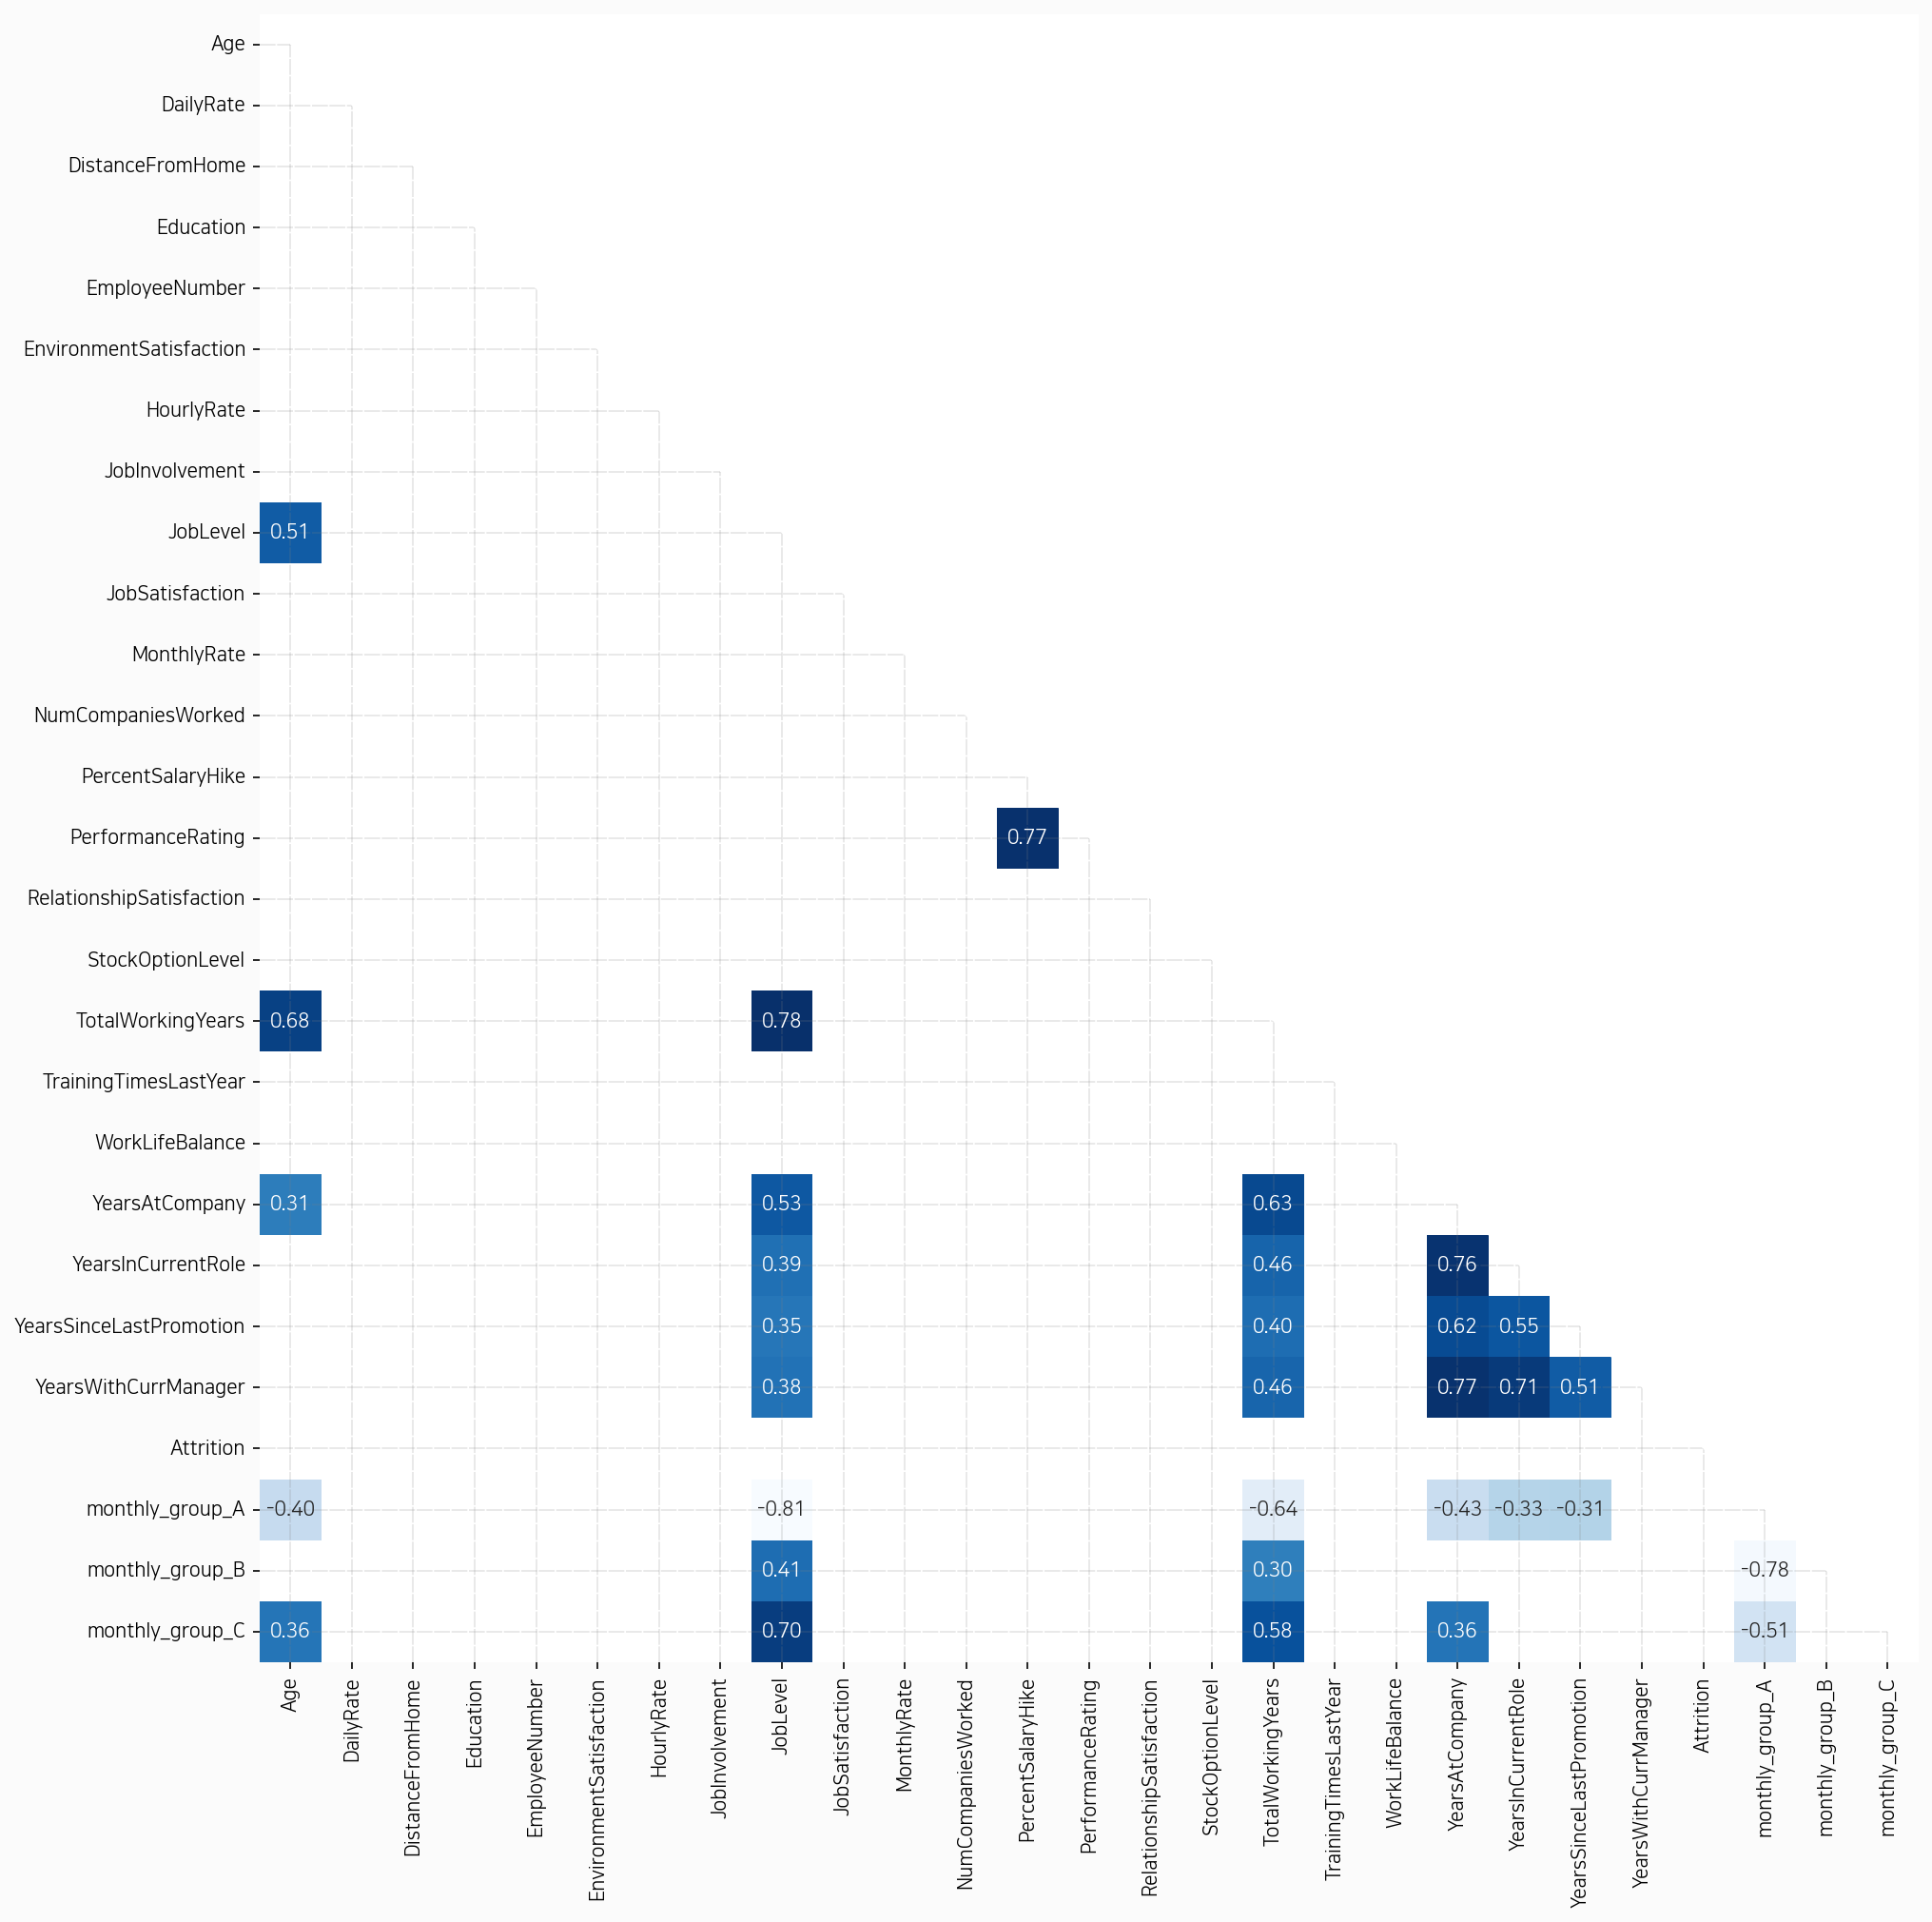

In [36]:
background_color = '#fbfbfb'
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15), dpi=150)
fig.patch.set_facecolor(background_color)
axes.grid(color='gray', linestyle='-', axis='both', zorder=0, dashes=(10,1), alpha=0.2)
mask = ((monthly_group_matrix >=0.3) | (monthly_group_matrix <=-0.3)) & (monthly_group_matrix !=1.0)
sns.heatmap(monthly_group_matrix, cmap='Blues', annot=True, fmt='.2f', mask=~mask, cbar=False)

# 삼각형
x = np.array([0, 100, 100])  # 삼각형의 x 좌표
y = np.array([0, 0, 100])    # 삼각형의 y 좌표
plt.fill(x, y, 'white', alpha=1, zorder=3)

- 월간 소득을 그룹화했을 때 Attrition과의 상관성은 없는 것으로 나타난다.
- 소득 구간에 따라 상관성이 나타나는 변수들이 있다.

## Satisfaction

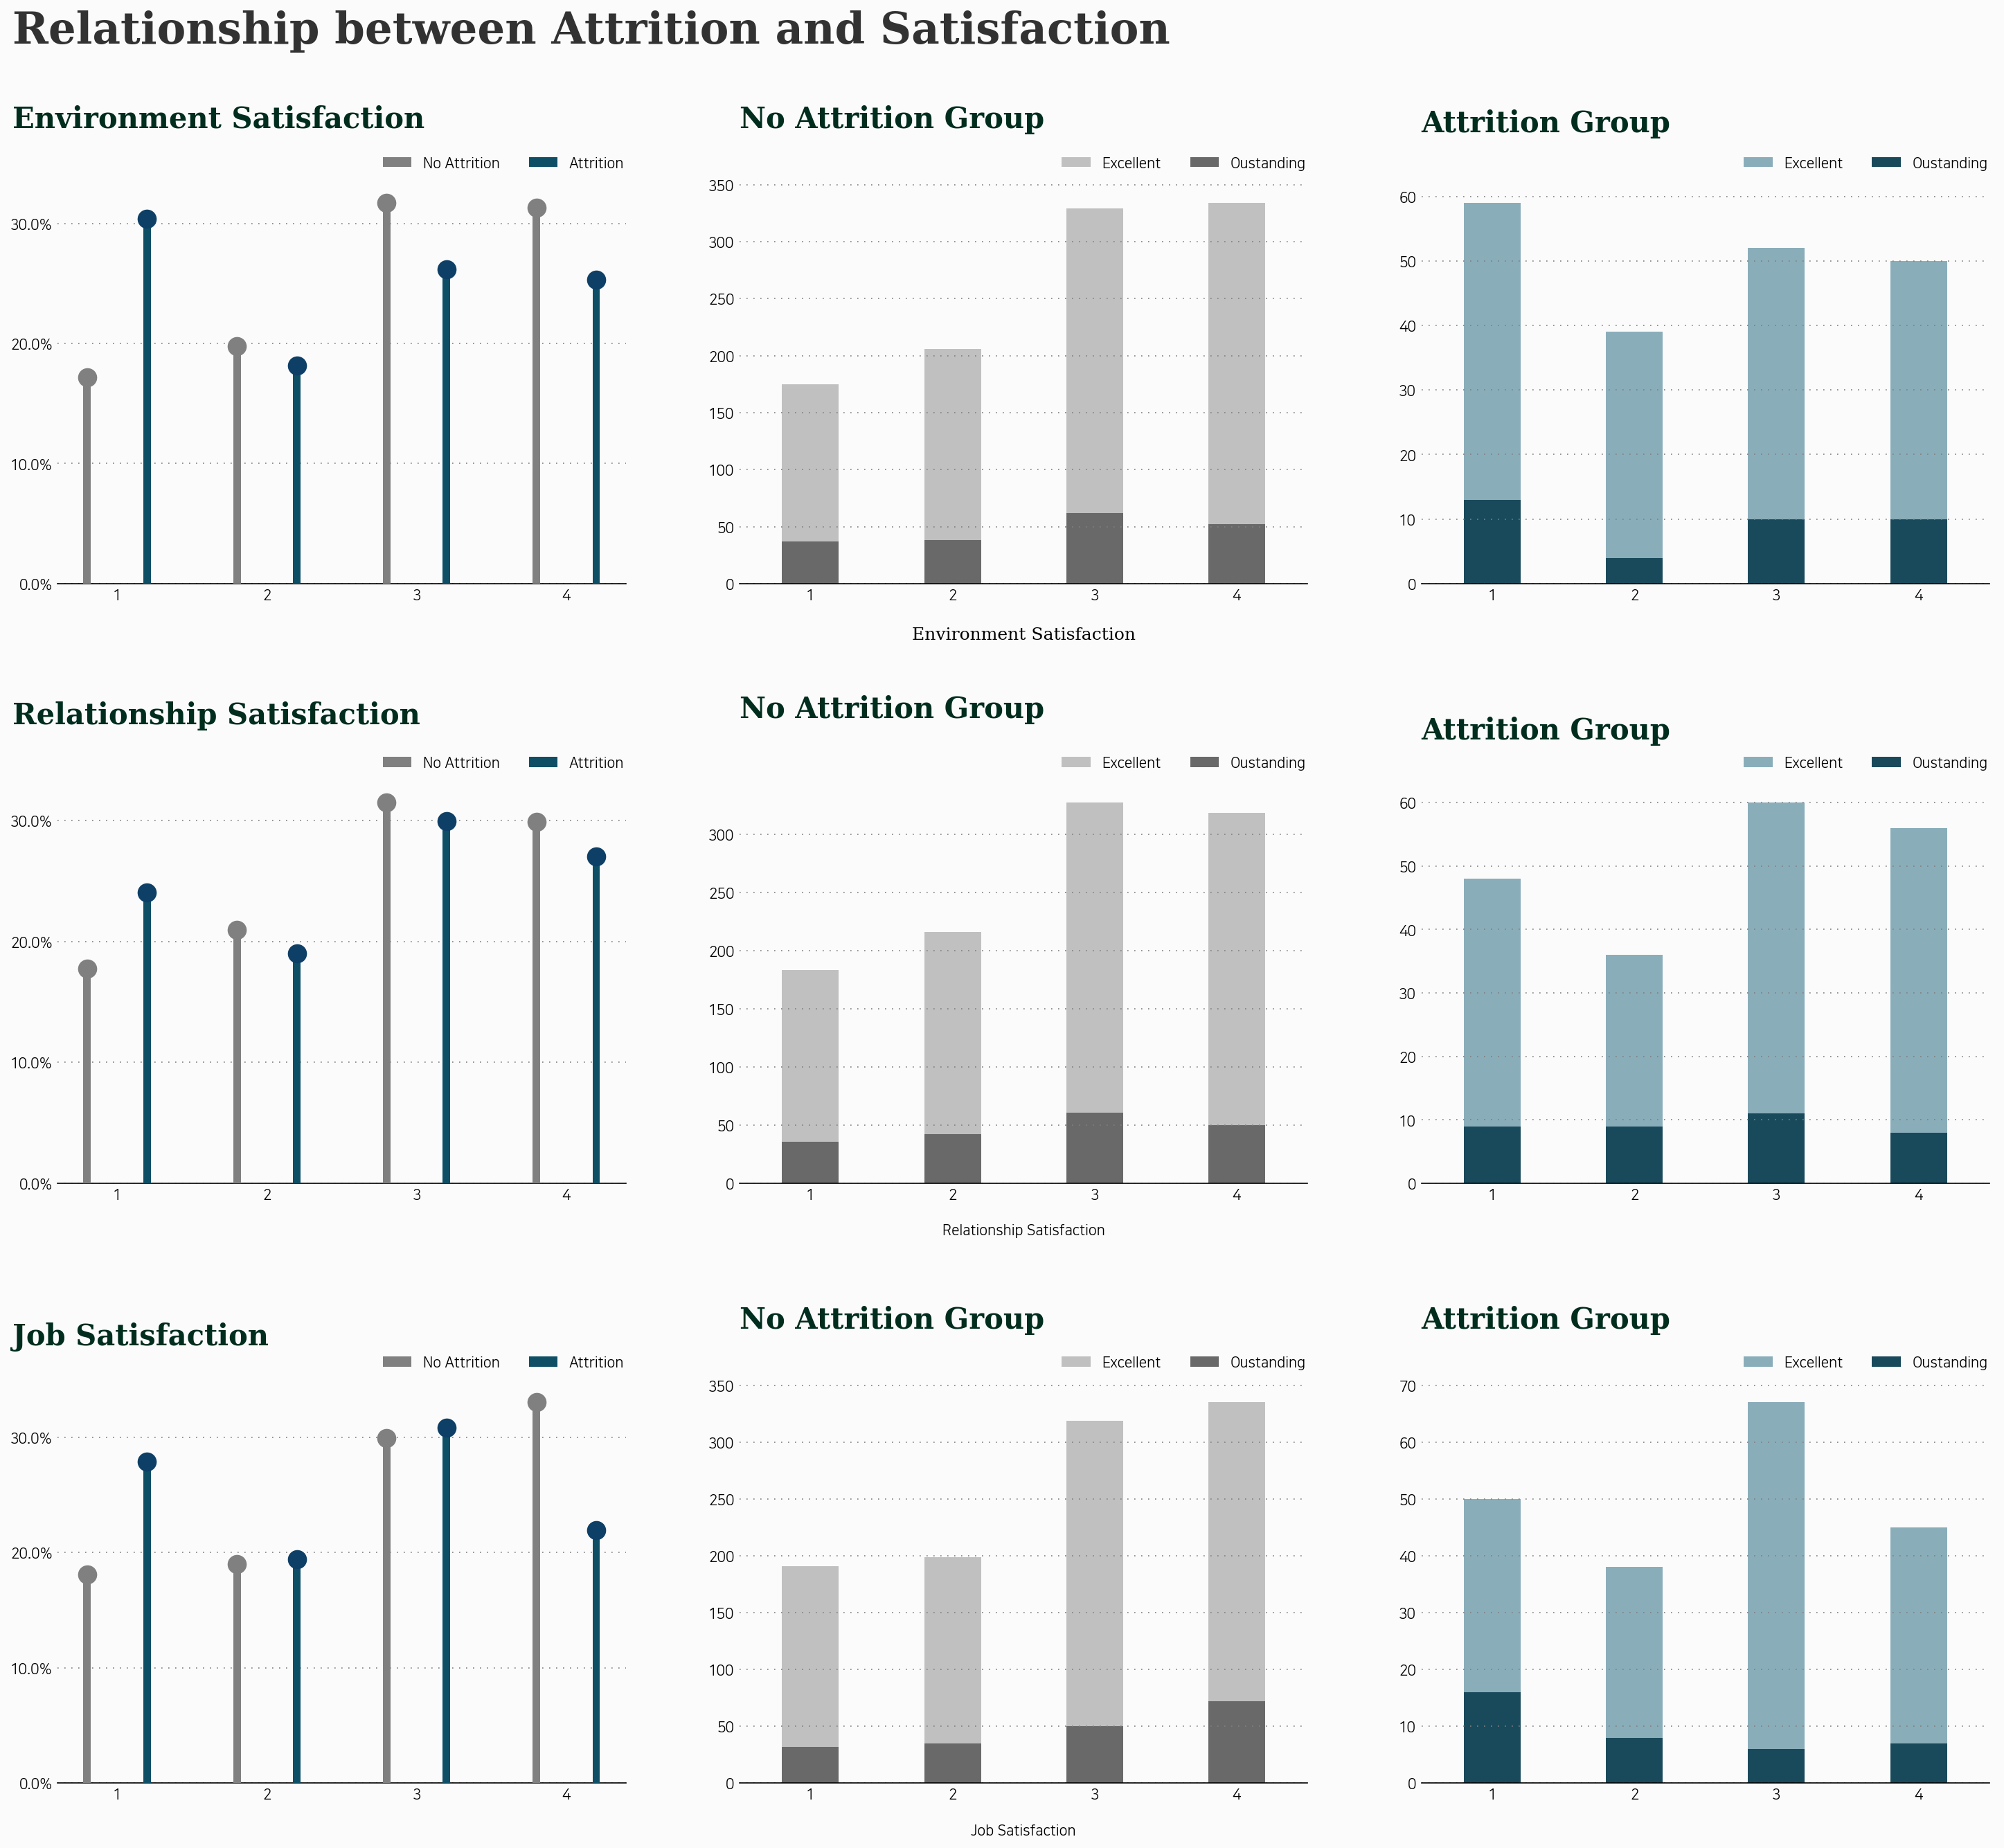

In [37]:
# 배경 색상 및 팔레트
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(24,20), dpi=150)
fig.patch.set_facecolor(background_color)

# ax 설정
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

#### 업무환경에 대한 만족도(EnvironmentSatisfaction)

# No Attrition
train = pd.DataFrame(pd.DataFrame(df[df['Attrition']=='No'])['EnvironmentSatisfaction'].value_counts())
train['percentage'] = train['count'].apply(lambda x:x/sum(train['count'])*100)
train = train.sort_values(by='EnvironmentSatisfaction')
# Attrition
test = pd.DataFrame(pd.DataFrame(df[df['Attrition']=='Yes'])['EnvironmentSatisfaction'].value_counts())
test['percentage'] = test['count'].apply(lambda x:x/sum(test['count'])*100)
test = test.sort_values(by='EnvironmentSatisfaction')

ax0.text(-0.5,45, "Relationship between Attrition and Satisfaction", fontsize=30, fontweight='bold', fontfamily='Serif', color='#323232')
ax0.text(-0.5,38, "Environment Satisfaction", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')

ax0.grid(color='gray', linestyle='--', axis='y', zorder=0, dashes=(1,5))
ax0.bar(np.arange(len(train.index)), height=train['percentage'], zorder=3, color='gray', width=0.05, label='No Attrition')
ax0.scatter(np.arange(len(train.index)), train['percentage'], zorder=3, color='gray', s=150)
ax0.bar(np.arange(len(test.index))+0.4, height=test['percentage'], zorder=3, color='#0e4f66', width=0.05, label='Attrition')
ax0.scatter(np.arange(len(test.index))+0.4, test['percentage'], zorder=3, color='#0e3f66', s=150)

# x축 레이블 포매팅
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(train.index))+0.4/2)
ax0.set_xticklabels(list(train.index), rotation=0)

ax0.legend(ncol=2, loc='upper right', bbox_to_anchor=(1.02,1.1), facecolor=background_color, edgecolor=background_color)
#ax0.set_xlabel('\nSatisfaction Rate', fontfamily='serif', fontsize=12, fontweight='light', loc='center')

"""
1. 만족도 1에서 두드러지는 차이 (Attrition 영향이 높음)
   만족도 2~4는 No Attrition 비율이 높은데 1에서만 두드러짐
   1에서만 만족도 떨어지는 퇴직 그룹이 다른 그룹과의 차이가 있을 것이다.
   다른 퇴직 그룹과도 차이가 있을 것이다.
2. 구성 비율은 퇴직, 퇴직 하지 않은 그룹이 유사한 분포로 나타나고 있다.
"""

## Performance Group 비교

# No Attrition
ax1.grid(color='gray', linestyle='--', axis='y', zorder=0, dashes=(1,5))
sns.countplot(data=df[(df.Attrition =='No') & (df.PerformanceRating==3)], x='EnvironmentSatisfaction', ax=ax1, color='#c0c0c0', width=0.4, label='Excellent')
sns.countplot(data=df[(df.Attrition =='No') & (df.PerformanceRating==4)], x= 'EnvironmentSatisfaction', ax=ax1, color='dimgray', width=0.4, label='Oustanding')
ax1.text(-0.5, 400, "No Attrition Group", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')
#ax1.set_xlabel('\nSatisfaction Rate', fontfamily='serif', fontsize=12, fontweight='light', loc='center')
ax1.legend(ncol=2, loc='upper right', bbox_to_anchor=(1.02,1.1), facecolor=background_color, edgecolor=background_color)

# Attrition
ax2.grid(color='gray', linestyle='--', axis='y', zorder=0, dashes=(1,5))
sns.countplot(data=df[(df.Attrition =='Yes') & (df.PerformanceRating==3)], x='EnvironmentSatisfaction', ax=ax2, color='#82b1c2', width=0.4, label='Excellent')  #['#82b1c2','#0e4f66']
sns.countplot(data=df[(df.Attrition =='Yes') & (df.PerformanceRating==4)], x= 'EnvironmentSatisfaction', ax=ax2, color='#0e4f66', width=0.4, label='Oustanding')
ax2.text(-0.5, 70, "Attrition Group", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')
#ax2.set_xlabel('\nSatisfaction Rate', fontfamily='serif', fontsize=12, fontweight='light', loc='center')
ax2.legend(ncol=2, loc='upper right', bbox_to_anchor=(1.02,1.1), facecolor=background_color, edgecolor=background_color)
#ax2.set_ylim(0,350)

#### Relation Satisfaction

# No Attrition
train = pd.DataFrame(pd.DataFrame(df[df['Attrition']=='No'])['RelationshipSatisfaction'].value_counts())
train['percentage'] = train['count'].apply(lambda x:x/sum(train['count'])*100)
train = train.sort_values(by='RelationshipSatisfaction')
# Attrition
test = pd.DataFrame(pd.DataFrame(df[df['Attrition']=='Yes'])['RelationshipSatisfaction'].value_counts())
test['percentage'] = test['count'].apply(lambda x:x/sum(test['count'])*100)
test = test.sort_values(by='RelationshipSatisfaction')

ax3.grid(color='gray', linestyle='--', axis='y', zorder=0, dashes=(1,5))
ax3.bar(np.arange(len(train.index)), height=train['percentage'], zorder=3, color='gray', width=0.05, label='No Attrition')
ax3.scatter(np.arange(len(train.index)), train['percentage'], zorder=3, color='gray', s=150)
ax3.bar(np.arange(len(test.index))+0.4, height=test['percentage'], zorder=3, color='#0e4f66', width=0.05, label='Attrition')
ax3.scatter(np.arange(len(test.index))+0.4, test['percentage'], zorder=3, color='#0e3f66', s=150)

# x축 레이블 포매팅
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax3.set_xticks(np.arange(len(train.index))+0.4/2)
ax3.set_xticklabels(list(train.index), rotation=0)

ax3.text(-0.5,38, "Relationship Satisfaction", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')
ax3.legend(ncol=2, loc='upper right', bbox_to_anchor=(1.02,1.1), facecolor=background_color, edgecolor=background_color)
#ax3.set_xlabel('\nSatisfaction Rate', fontfamily='serif', fontsize=12, fontweight='light', loc='center')

## Performance Group 비교

# No Attrition
ax4.grid(color='gray', linestyle='--', axis='y', zorder=0, dashes=(1,5))
sns.countplot(data=df[(df.Attrition =='No') & (df.PerformanceRating==3)], x='RelationshipSatisfaction', ax=ax4, color='#c0c0c0', width=0.4, label='Excellent')
sns.countplot(data=df[(df.Attrition =='No') & (df.PerformanceRating==4)], x= 'RelationshipSatisfaction', ax=ax4, color='dimgray', width=0.4, label='Oustanding')
ax4.text(-0.5, 400, "No Attrition Group", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')
#ax4.set_xlabel('\nSatisfaction Rate', fontfamily='serif', fontsize=12, fontweight='light', loc='center')
ax4.legend(ncol=2, loc='upper right', bbox_to_anchor=(1.02,1.1), facecolor=background_color, edgecolor=background_color)

# Attrition
ax5.grid(color='gray', linestyle='--', axis='y', zorder=0, dashes=(1,5))
sns.countplot(data=df[(df.Attrition =='Yes') & (df.PerformanceRating==3)], x='RelationshipSatisfaction', ax=ax5, color='#82b1c2', width=0.4, label='Excellent')  #['#82b1c2','#0e4f66']
sns.countplot(data=df[(df.Attrition =='Yes') & (df.PerformanceRating==4)], x= 'RelationshipSatisfaction', ax=ax5, color='#0e4f66', width=0.4, label='Oustanding')
ax5.text(-0.5, 70, "Attrition Group", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')
#ax5.set_xlabel('\nSatisfaction Rate', fontfamily='serif', fontsize=12, fontweight='light', loc='center')
ax5.legend(ncol=2, loc='upper right', bbox_to_anchor=(1.02,1.1), facecolor=background_color, edgecolor=background_color)
#ax5.set_ylim(0,350)


#### Job Satisfaction

# No Attrition
train = pd.DataFrame(pd.DataFrame(df[df['Attrition']=='No'])['JobSatisfaction'].value_counts())
train['percentage'] = train['count'].apply(lambda x:x/sum(train['count'])*100)
train = train.sort_values(by='JobSatisfaction')
# Attrition
test = pd.DataFrame(pd.DataFrame(df[df['Attrition']=='Yes'])['JobSatisfaction'].value_counts())
test['percentage'] = test['count'].apply(lambda x:x/sum(test['count'])*100)
test = test.sort_values(by='JobSatisfaction')

ax6.grid(color='gray', linestyle='--', axis='y', zorder=0, dashes=(1,5))
ax6.bar(np.arange(len(train.index)), height=train['percentage'], zorder=3, color='gray', width=0.05, label='No Attrition')
ax6.scatter(np.arange(len(train.index)), train['percentage'], zorder=3, color='gray', s=150)
ax6.bar(np.arange(len(test.index))+0.4, height=test['percentage'], zorder=3, color='#0e4f66', width=0.05, label='Attrition')
ax6.scatter(np.arange(len(test.index))+0.4, test['percentage'], zorder=3, color='#0e3f66', s=150)

# x축 레이블 포매팅
ax6.yaxis.set_major_formatter(mtick.PercentFormatter())
ax6.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax6.set_xticks(np.arange(len(train.index))+0.4/2)
ax6.set_xticklabels(list(train.index), rotation=0)

ax6.text(-0.5,38, "Job Satisfaction", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')
ax6.legend(ncol=2, loc='upper right', bbox_to_anchor=(1.02,1.1), facecolor=background_color, edgecolor=background_color)

## Performance Group 비교

# No Attrition
ax7.grid(color='gray', linestyle='--', axis='y', zorder=0, dashes=(1,5))
sns.countplot(data=df[(df.Attrition =='No') & (df.PerformanceRating==3)], x='JobSatisfaction', ax=ax7, color='#c0c0c0', width=0.4, label='Excellent')
sns.countplot(data=df[(df.Attrition =='No') & (df.PerformanceRating==4)], x= 'JobSatisfaction', ax=ax7, color='dimgray', width=0.4, label='Oustanding')
ax7.text(-0.5, 400, "No Attrition Group", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')
#ax7.set_xlabel('\nSatisfaction Rate', fontfamily='serif', fontsize=12, fontweight='light', loc='center')
ax7.legend(ncol=2, loc='upper right', bbox_to_anchor=(1.02,1.1), facecolor=background_color, edgecolor=background_color)

# Attrition
ax8.grid(color='gray', linestyle='--', axis='y', zorder=0, dashes=(1,5))
sns.countplot(data=df[(df.Attrition =='Yes') & (df.PerformanceRating==3)], x='JobSatisfaction', ax=ax8, color='#82b1c2', width=0.4, label='Excellent')  #['#82b1c2','#0e4f66']
sns.countplot(data=df[(df.Attrition =='Yes') & (df.PerformanceRating==4)], x= 'JobSatisfaction', ax=ax8, color='#0e4f66', width=0.4, label='Oustanding')
ax8.text(-0.5, 80, "Attrition Group", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')
#ax8.set_xlabel('\nSatisfaction Rate', fontfamily='serif', fontsize=12, fontweight='light', loc='center')
ax8.legend(ncol=2, loc='upper right', bbox_to_anchor=(1.02,1.1), facecolor=background_color, edgecolor=background_color)
#ax8.set_ylim(0,350)


#####

# ax의 색상 배경 색상과 동일하게 채우기
for i in range(0,9):
  locals()['ax'+str(i)].set_facecolor(background_color)

# 눈금, 눈금 레이블 및 격자 선 매개변수 양쪽 축에 적용
for i in range(0,9):
  locals()['ax'+str(i)].tick_params(axis=u'both', which=u'both', length=0)

# 축 지우기
for s in ['top','right','left']:
  for i in range(0,9):
    locals()['ax'+str(i)].spines[s].set_visible(False)

# x축 이름 설정
ax0.set_xlabel('')
ax1.set_xlabel('\nEnvironment Satisfaction', fontfamily='serif', fontsize=12, fontweight='light')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('\nRelationship Satisfaction')
ax5.set_xlabel('')
ax6.set_xlabel('')
ax7.set_xlabel('\nJob Satisfaction')
ax8.set_xlabel('')

# y축 이름 설정
ax0.set_ylabel('')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
ax6.set_ylabel('')
ax7.set_ylabel('')
ax8.set_ylabel('')

plt.show()

##### 만족도 간의 상관성
##### 만족도 1과 Attrition => 1, 나머지 0

- Job Satisfaction에서 차이
  - 전체적으로 1에서는 퇴직 그룹이 부각되고, 4에서는 퇴직하지 않는 그룹의 비율이 높음
  - 퇴직 그룹/ 퇴직x 그룹에 따라서는 전반적 추세는 비교적 유사
  - 퇴직 하지 않은 그룹에서 차이
    - 3번 그룹에서 Oustanding 비율이 낮게 나타남 (Excellent가 높은 비율)

In [38]:
env_sat_1 = df[df['EnvironmentSatisfaction']==1]
env_sat_2 = df[df['EnvironmentSatisfaction']==2]
env_sat_34 = df[(df.EnvironmentSatisfaction ==3)|(df.EnvironmentSatisfaction==4)]

In [39]:
env_df = df.copy()

In [40]:
env_df.EnvironmentSatisfaction = env_df.EnvironmentSatisfaction.astype(str)

In [41]:
env_target_con = (env_df.EnvironmentSatisfaction=='1') & (env_df.Attrition=='Yes')

In [42]:
from scipy.stats import chi2_contingency

group_env_target = env_df[env_target_con]
group_env_other = env_df[~env_target_con]

crosstab_group1 = pd.crosstab(group_env_target['EnvironmentSatisfaction'], group_env_target['Attrition'])
crosstab_group2 = pd.crosstab(group_env_other['EnvironmentSatisfaction'], group_env_other['Attrition'])

In [43]:
# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(crosstab_group1.values + crosstab_group2.values, correction=False)

print(f'Chi-2    : {chi2}')
print(f'p- value : {pvalue}')

Chi-2    : 5.087530729796807
p- value : 0.0010200340121534705


- p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다.
- 환경 만족도가 1인 그룹과 그 외인 그룹 간에는 Attrition 상태에 따른 차이가 통계적으로 유의미하다.

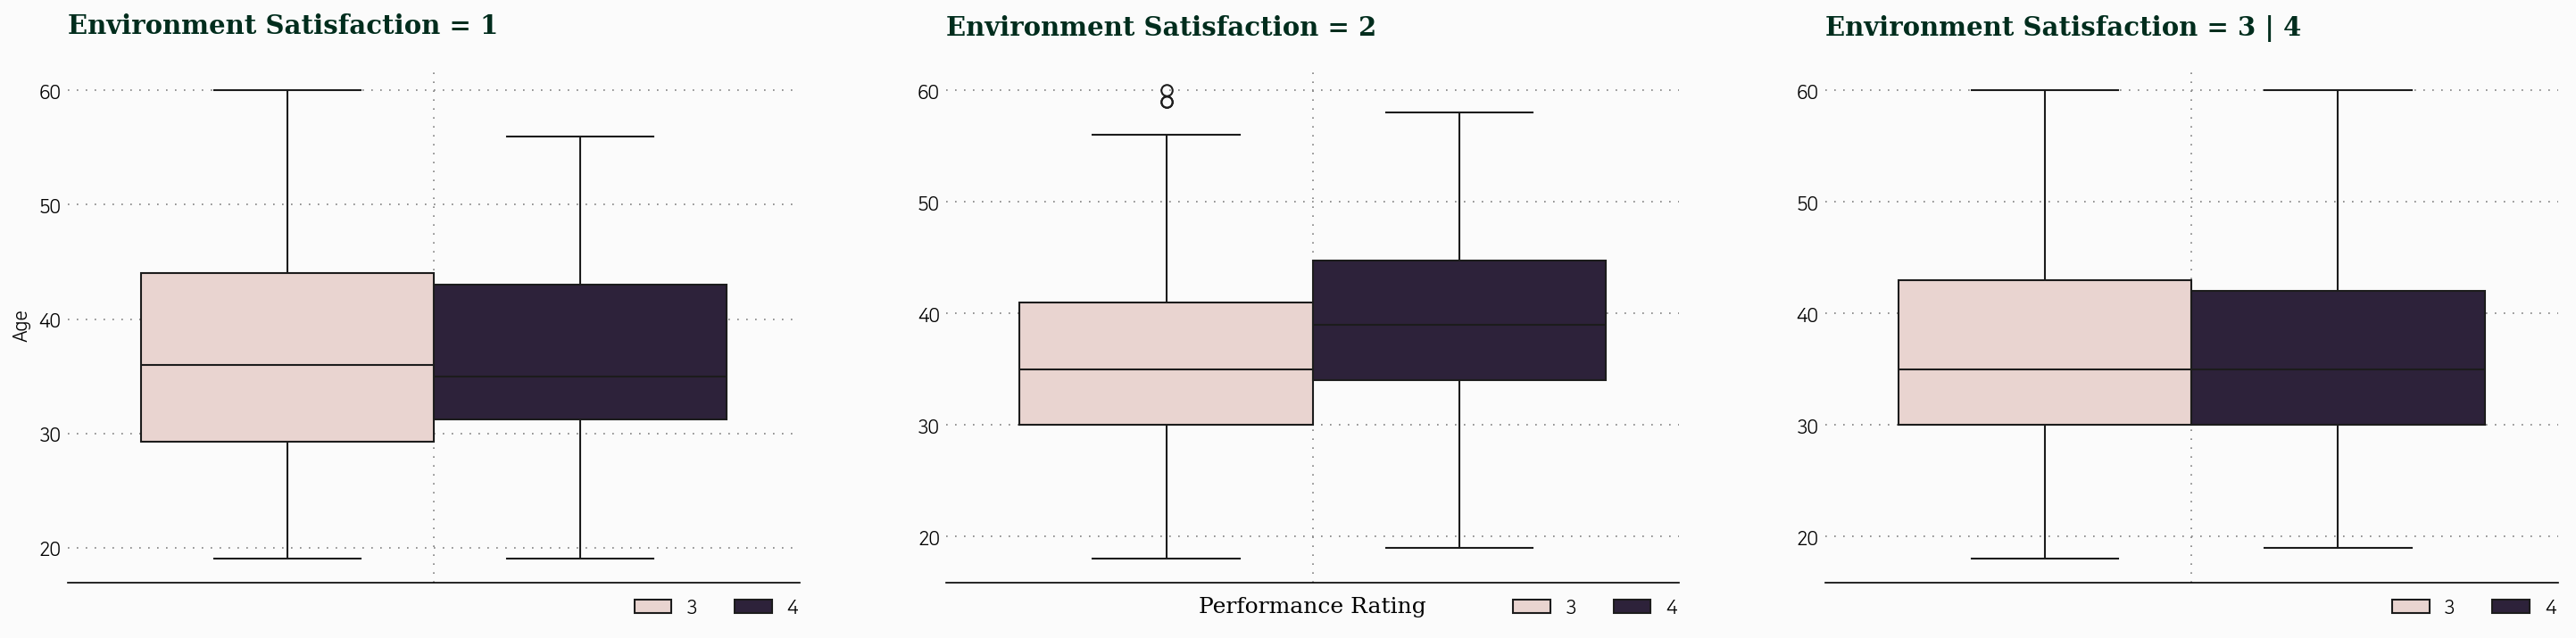

In [44]:
# 배경 색상 및 팔레트
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(24,20), dpi=150)
fig.patch.set_facecolor(background_color)

# ax 설정
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.2, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

# Env sat == 1
sns.boxplot(env_sat_1, y='Age', hue='PerformanceRating', ax=ax0)
sns.boxplot(env_sat_2, y='Age', hue='PerformanceRating', ax=ax1)
sns.boxplot(env_sat_34, y='Age', hue='PerformanceRating', ax=ax2)
ax0.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
ax1.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
ax2.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
ax0.legend(ncol=2, loc='lower right', bbox_to_anchor=(1.02,-0.1), facecolor=background_color, edgecolor=background_color)
ax1.legend(ncol=2, loc='lower right', bbox_to_anchor=(1.02,-0.1), facecolor=background_color, edgecolor=background_color)
ax2.legend(ncol=2, loc='lower right', bbox_to_anchor=(1.02,-0.1), facecolor=background_color, edgecolor=background_color)
ax0.text(-0.5, 65, "Environment Satisfaction = 1", fontsize=14, fontweight='bold', fontfamily='serif', color='#002d1d')
ax1.text(-0.5, 65, "Environment Satisfaction = 2", fontsize=14, fontweight='bold', fontfamily='serif', color='#002d1d')
ax2.text(-0.5, 65, "Environment Satisfaction = 3 | 4", fontsize=14, fontweight='bold', fontfamily='serif', color='#002d1d')

# ax의 색상 배경 색상과 동일하게 채우기
for i in range(0,3):
  locals()['ax'+str(i)].set_facecolor(background_color)

# 눈금, 눈금 레이블 및 격자 선 매개변수 양쪽 축에 적용
for i in range(0,3):
  locals()['ax'+str(i)].tick_params(axis=u'both', which=u'both', length=0)

# 축 지우기
for s in ['top','right','left']:
  for i in range(0,3):
    locals()['ax'+str(i)].spines[s].set_visible(False)

# x축 이름 설정
ax0.set_xlabel('')
ax1.set_xlabel('Performance Rating', fontfamily='serif', fontsize=12, fontweight='light')
ax2.set_xlabel('')

# y축 이름 설정
ax0.set_ylabel('Age')
ax1.set_ylabel('')
ax2.set_ylabel('')

plt.show()

# 모델링

**특성 중요도 확인**

In [45]:
dummy_df2 = pd.get_dummies(df[['BusinessTravel','Department','EducationField','Gender','Distance_group','monthly_group','Attrition','JobRole','MaritalStatus','OverTime']], dtype=int)
df2_concat = pd.concat([df, dummy_df2], axis=1)
df2_concat.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,0,0,1,0,0,0,1,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,1,0,0,0,1,0,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,0,0,0,1,0,1


In [46]:
df2_concat.drop(['Attrition', 'Attrition_No','BusinessTravel','Department','EducationField','Distance_group','monthly_group','EmployeeNumber','Gender', 'Gender_Female','JobRole','MaritalStatus','OverTime','OverTime_No','Over18','EmployeeCount'], axis=1, inplace=True)
df2_concat.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,1,0,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,1,0,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,0,1,1


In [47]:
from sklearn.ensemble import RandomForestClassifier

# Feature와 Target 분리
X = df2_concat.drop(columns=['Attrition_Yes'])
y = df2_concat['Attrition_Yes']

# 랜덤 포레스트 모델 초기화
rf_model = RandomForestClassifier(random_state=42)

# 모델 학습
rf_model.fit(X, y)

# 특성 중요도 추출
importances = rf_model.feature_importances_

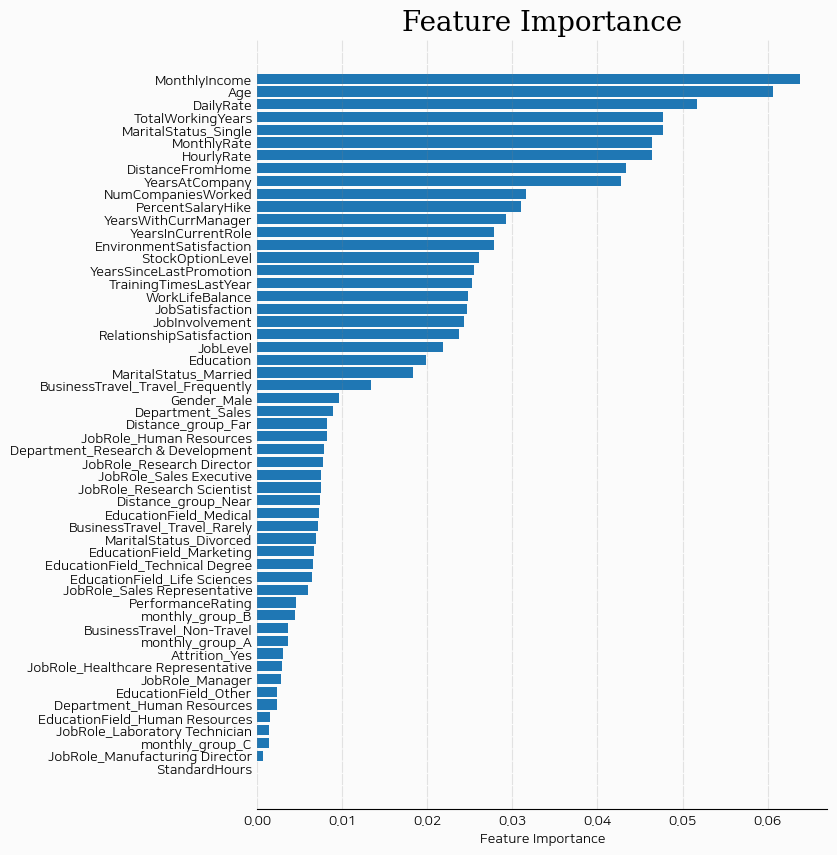

In [48]:
# 특성 이름
feature_names = df2_concat.columns

# 특성 중요도와 특성 이름을 튜플로 묶음
feature_importance = [(feature, importance) for feature, importance in zip(feature_names, importances)]

# 중요도가 높은 순으로 정렬
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=False)

# 정렬된 특성 중요도와 이름을 다시 분리
sorted_importances = [importance for _, importance in sorted_feature_importance]
sorted_feature_names = [feature for feature, _ in sorted_feature_importance]

#### 특성 중요도 시각화

# 배경 색상 및 팔레트
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(25,40), dpi=100)
fig.patch.set_facecolor(background_color)

# ax 설정
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.2, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])

ax0.grid(color='gray', linestyle='-', axis='x', zorder=0, dashes=(10,1), alpha=0.2)
ax0.barh(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
ax0.set_ylabel('')

ax0.set_title('Feature Importance', fontsize=20, fontfamily='serif')

# 배경 색상 지우기
ax0.set_facecolor(background_color)

# 눈금, 눈금 레이블 및 격자 선 매개변수 양쪽 축에 적용
ax0.tick_params(axis=u'both', which=u'both', length=0)

# 축 지우기
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)

In [49]:
## 이후 모델링 선정 예정